In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

data = pd.read_csv("PS_2023.02.01_18.28.47.csv",comment='#')

def names(dataframe):
    for p in dataframe.keys():
        print(format(p))

In [2]:
names(data)

pl_name
hostname
tic_id
default_flag
sy_snum
sy_pnum
discoverymethod
disc_year
disc_facility
tran_flag
soltype
pl_controv_flag
pl_refname
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_rade
pl_radeerr1
pl_radeerr2
pl_radelim
pl_radj
pl_radjerr1
pl_radjerr2
pl_radjlim
pl_bmasse
pl_bmasseerr1
pl_bmasseerr2
pl_bmasselim
pl_bmassj
pl_bmassjerr1
pl_bmassjerr2
pl_bmassjlim
pl_bmassprov
pl_dens
pl_denserr1
pl_denserr2
pl_denslim
pl_orbeccen
pl_orbeccenerr1
pl_orbeccenerr2
pl_orbeccenlim
pl_insol
pl_insolerr1
pl_insolerr2
pl_insollim
pl_eqt
pl_eqterr1
pl_eqterr2
pl_eqtlim
pl_orbincl
pl_orbinclerr1
pl_orbinclerr2
pl_orbincllim
ttv_flag
pl_imppar
pl_impparerr1
pl_impparerr2
pl_impparlim
pl_trandep
pl_trandeperr1
pl_trandeperr2
pl_trandeplim
pl_trandur
pl_trandurerr1
pl_trandurerr2
pl_trandurlim
st_refname
st_spectype
st_teff
st_tefferr1
st_tefferr2
st_tefflim
st_rad
st_raderr1
st_raderr2
st_radlim
st_mass
st_masserr1
st_masserr2
st_ma

In [3]:
parameters = ['pl_name',
            'pl_bmassj','pl_radj','st_mass','st_rad','pl_eqt',
            'pl_orbper','pl_orbsmax','pl_orbeccen','pl_orbincl',
            'st_met','st_teff','st_age','pl_trandep','st_spectype']
parameter_high = ['pl_name',
                  'pl_bmassjerr1','pl_radjerr1','st_masserr1','st_raderr1','pl_eqterr1',
                  'pl_orbpererr1','pl_orbsmaxerr1','pl_orbeccenerr1','pl_orbinclerr1',
                 'st_metfeerr1','st_tefferr1','st_ageerr1','pl_trandeperr1']
parameter_low = ['pl_name',
                 'pl_bmassjerr2','pl_radjerr2','st_masserr2','st_raderr2','pl_eqterr2',
                  'pl_orbpererr2','pl_orbsmaxerr2','pl_orbeccenerr2','pl_orbinclerr2',
                 'st_metfeerr2','st_tefferr2','st_ageerr2','pl_trandeperr2']

det_type=data.loc[:,'discoverymethod']
trans = data[det_type == 'Transit']
rv = data[det_type == 'Radial Velocity']
img = data[det_type == 'Imaging']
ttv=data[det_type =='Transit Timing Variations']
lens=data[det_type =='Microlensing'] 
# timing includes TTVs, Eclipse Timing Variations, Pulsar Timing, and Pulsar Timing Variations,
timing=(data["discoverymethod"]== "Pulsar Timing")|(data["discoverymethod"]== "Pulsation Timing Variations")|(data["discoverymethod"]== "Eclipse Timing Variations")|(data["discoverymethod"]== "Transit Timing Variations")

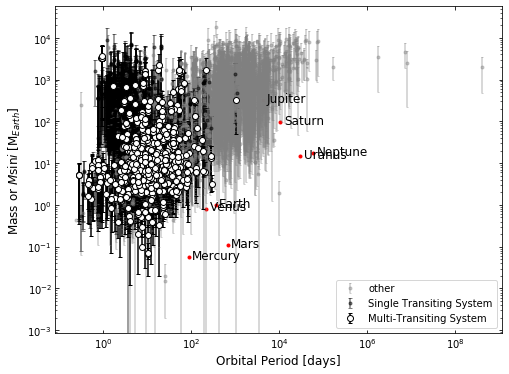

In [103]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log') 
ax.set_yscale('log')
plt.errorbar(data[other].pl_orbper,data[other].pl_bmasse,yerr=(data[other].pl_bmasse-data[other].pl_bmasseerr1,data[other].pl_bmasseerr2+data[other].pl_bmasse),fmt=".",color="grey",alpha=0.4,label="other",capsize=1)
plt.errorbar(data[single].pl_orbper,data[single].pl_bmasse,yerr=(data[single].pl_bmasse-data[single].pl_bmasseerr1,data[single].pl_bmasseerr2+data[single].pl_bmasse),fmt=".",color="black",alpha=0.5,label="Single Transiting System",capsize=2)
plt.errorbar(data[multi].pl_orbper,data[multi].pl_bmasse,yerr=(data[multi].pl_bmasse-data[multi].pl_bmasseerr1,data[multi].pl_bmasseerr2+data[multi].pl_bmasse),fmt="o",color="black",mfc="white",label="Multi-Transiting System",capsize=2)
plt.scatter(ssper,ssmass/MEARTH,marker=".",color="red")
for i in range(len(ssplanets)):
    plt.text(1.2*ssper[i],0.9*(ssmass[i]/MEARTH),ssplanets[i],fontdict=font)
plt.legend(fontsize="medium")
plt.xlabel("Orbital Period [days]",fontsize='large')
plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
ax.minorticks_on()
#plt.errorbar(ttv.pl_orbper,ttv.pl_bmasse,ttv.pl_bmasseerr1,fmt=".",color="blue",alpha=0.25,label="TTV",capsize=3)

In [111]:
#orbital params
per=data['pl_orbper'] #days
sma=data['pl_orbsmax'] #AU
ecc=data['pl_orbeccen']
inc=data['pl_orbincl']
# planet params
mp_earth=data['pl_bmasse'] # M_earth
mp=data['pl_bmassj'] # M_jupiter
rp=data['pl_radj'] # R_jupiter
# stellar params
mstar=data['st_mass'] # M_sun
rstar=data['st_rad'] # R_sun
stype=data['st_spectype']
feh=data['st_met']
teff=data['st_teff']

MEARTH = 5.9742e24 #kg 
REARTH = 6.3781e6 #km
MJUP = 1.8986e27 #kg
RJUP = 6.9911e11 #km

# Solar System params
ssplanets=["Mercury", "Venus", "Earth", "Mars","Jupiter" ,"Saturn","Uranus","Neptune"]
ssshort=["Mer","V","E","M","J","S","U","N"]
ssmass = np.array([0.3302, 4.8685, 5.9736, 0.64185, 1898.6, 568.46, 86.832, 102.43]) * 10**24 #kg
ssper = np.array([88.0,224.7,365.2,687.0,4331,10747,30589,59800]) #days
ssecc= [0.205,0.007,0.017,0.094,0.049,0.057,0.046,0.011]
ssrad = [2439.7,6051.8,6371.00,3389.50,69911,58232,25362,24622] #km
ssrad_pm = [1.0,1.0,0.01,0.2,6,6,7,19]

In [97]:
multi=(data["sy_pnum"]> 1) & (data["discoverymethod"]== "Transit")
single=(data["sy_pnum"]== 1) & (data["discoverymethod"]== "Transit")
other=(data["discoverymethod"]!= "Transit")# (data["pl_discmethod"]== "Transit Timing Variations")
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12
        }
def plot_per_vs_mp():
    fig,ax = plt.subplots(figsize=(8,6))
    ax.set_xscale('log') 
    ax.set_yscale('log')
    plt.errorbar(data[other].pl_orbper,data[other].pl_bmasse,yerr=(data[other].pl_bmasse-data[other].pl_bmasseerr1,data[other].pl_bmasseerr2+data[other].pl_bmasse),fmt=".",color="grey",alpha=0.2,label="Other Disc. Method",capsize=1)

#     plt.scatter(data[other].pl_orbper,data[other].pl_bmasse,label="Other Disc. Method",marker=".",color='gray',alpha=0.45)
#     plt.scatter(data[single].pl_orbper,data[single].pl_bmasse,label="Single Transiting System",marker=".",color="black")
#     plt.scatter(data[multi].pl_orbper,data[multi].pl_bmasse,label="Multi-Transiting System",marker="o",color='white',edgecolors='black')

    plt.scatter(ssper,ssmass/MEARTH,marker=".",color="red")
    plt.text(300,0.6,"Venus",fontdict=font)
    plt.text(480,0.88,"Earth",fontdict=font)
    plt.text(120,0.045,"Mercury",fontdict=font)
    plt.text(990,0.095,"Mars",fontdict=font)
    plt.text(5200,270,"Jupiter",fontdict=font)
    plt.text(14000,80,"Saturn",fontdict=font)
    plt.text(2800,13,"Uranus",fontdict=font)
    plt.text(81000,15,"Neptune",fontdict=font)
    plt.xlabel("Orbital Period [days]",fontsize='large')
    plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
    plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
    ax.minorticks_on()
    plt.legend(loc=4,fontsize='medium')
    plt.show()

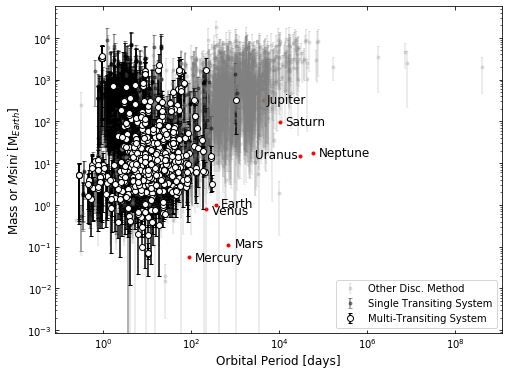

In [98]:
plot_per_vs_mp()

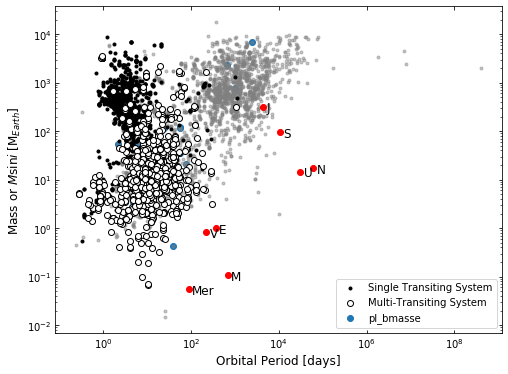

In [138]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_xscale('log') 
ax.set_yscale('log')
x3=plt.scatter(ttv.pl_orbper,ttv.pl_bmasse,label="TTV",color=)
xo=plt.scatter(data[other].pl_orbper,data[other].pl_bmasse,label="Other",marker=".",color='gray',alpha=0.45)
x1=plt.scatter(data[single].pl_orbper,data[single].pl_bmasse,label="Single Transiting System",marker=".",color="black")
x2=plt.scatter(data[multi].pl_orbper,data[multi].pl_bmasse,label="Multi-Transiting System",marker="o",color='white',edgecolors='black')
ss=plt.scatter(ssper,ssmass/MEARTH,marker="o",color="red",label="SS Planets")
for i in range(len(ssplanets)):
    plt.text(1.2*ssper[i],0.8*(ssmass[i]/MEARTH),ssshort[i],fontdict=font)
plt.xlabel("Orbital Period [days]",fontsize='large')
plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
ax.minorticks_on()
plt.legend(handles=[x1,x2,x3],loc=4,fontsize='medium')

In [ ]:
def plot_rp_vs_mp():
    fig,ax = plt.subplots(figsize=(8,6))
    ax.set_xscale('log') 
    ax.set_yscale('log')
    plt.scatter(data[other].pl_radj,data[other].pl_bmassj,label="Other Disc. Method",marker=".",color='gray',alpha=0.45)
    plt.scatter(data[single].pl_radj,data[single].pl_bmassj,label="Single Transiting System",marker=".",color="black")
    plt.scatter(data[multi].pl_orbper,data[multi].pl_bmassj,label="Multi-Transiting System",marker="o",color='white',edgecolors='black')
    plt.scatter(ssper,ssmass/MEARTH,marker=".",color="red")
    # plt.text(300,0.6,"Venus",fontdict=font)
    # plt.text(480,0.88,"Earth",fontdict=font)
    # plt.text(120,0.045,"Mercury",fontdict=font)
    # plt.text(990,0.095,"Mars",fontdict=font)
    # plt.text(5200,270,"Jupiter",fontdict=font)
    # plt.text(14000,80,"Saturn",fontdict=font)
    # plt.text(2800,13,"Uranus",fontdict=font)
    # plt.text(81000,15,"Neptune",fontdict=font)
    plt.xlabel("Orbital Period [days]",fontsize='large')
    plt.ylabel("Mass or $M\sin{i}$ [M$_{Earth}$]",fontsize='large')
    plt.tick_params(axis='both',which='both',direction='in',top=True,right=True)
    ax.minorticks_on()
    plt.legend(loc=4,fontsize='medium')
    plt.show()

In [2]:
import numpy as np
import rebound
import matplotlib.pyplot as plt

In [12]:
#astrophysical constants in CGS
GRAV=6.67384e-8
AU = 1.49598e13
PC = 3.08568025e18

MSUN = 1.98892e33
RSUN = 6.955e10

MEARTH = 5.9742e27
REARTH = 6.3781e8

MMOON = 7.342e25
RMOON = 1737.1e5
AMOON = 0.00257 # AU

MJUPITER = 1.8986e30
RJUPITER = 6.9911e9
AJUPITER = 4.84143144246472090 # AU

KILOGRAM = 1e3
METER = 1e2

# G=GRAV /1e3 #in MKS units
# AU=AU /1e2 #in MKS units
def calc_sma(Per,mu): # returns semi-major axis in AU
    mp=mu * (MSUN/MEARTH)/KILOGRAM
    mstar=MSUN/KILOGRAM
    a= (((GRAV/KILOGRAM)*(mstar + mp)* (Per*24*3600)**2) /(4*np.pi**2))**(1/3) 
    return a/(AU/1e2)
def calc_ecc(ecosom,esinom):
    return np.sqrt(ecosom**2 + esinom**2)
def calc_omega(ecosom,esinom):
    return np.arctan(esinom/ecosom)
def MMRs_overlap(a2,a1,mu2,mu1):
    sma_ratio=(a2 - a1)/a1
    if sma_ratio < 1.46*(mu1 + mu2)**(2/7):
        print("MMRs overlarp --> chaotic configuration")
        return True
    else: return False
def calc_Rhill(Per,mu,ecosom,esinom):
    ecc=calc_ecc(ecosom,esinom)
#     def Hill_radius(Per,mu,ecc):
    mp=mu * (MSUN/MEARTH)/KILOGRAM
    mstar=MSUN/KILOGRAM
    a = calc_sma(Per,mu)
    Hill_radius = (a * (1-ecc) * (mp/(3 * mstar))**(1/3))
    return Hill_radius
def mutual_Hill(Per1,mu1,Per2,mu2):  # returns mutual Hill radius in AU
    mp1=mu1 * (MSUN/MEARTH)/KILOGRAM
    mp2=mu2 * (MSUN/MEARTH)/KILOGRAM
    mstar=MSUN/KILOGRAM
    a1 = calc_sma(Per1,mu1);    a2 = calc_sma(Per2,mu2)
    return ((mp1 + mp2)/(3 * mstar))**(1/3) * (a1 + a2)/2

# def Hill_stability(μ, a, e, I) # input arrays of mu

In [110]:
np.array([2.5452514806996778e-6,2.938354131682856e-7,2.933151163231439e-7])*MSUN/MEARTH

array([0.84736058, 0.09782316, 0.09764994])

In [109]:
np.array([3.10658703046874e-6,1.0362878782161145e-7,1.0305464678911318e-7])*MSUN/MEARTH

array([1.03423941, 0.03449991, 0.03430877])

In [108]:
np.array([8.582495339894613e-5,9.304231194474255e-6,9.120456752760011e-6])*MSUN/MEARTH

array([28.57269029,  3.09754804,  3.03636618])

In [103]:
np.array([0.0007805546434104661, 0.00012398901850743476, 0.00011534586259462788])*MSUN/MEARTH

array([259.86085859,  41.27820272,  38.40073868])

In [94]:
planet_masses = [2.5452514806996778e-6,3.10658703046874e-6,8.582495339894613e-5,0.0007805546434104661]
planet_eccs=[0.00037316148837521765,0.013259865901709165,0.2614038172624099,0.039645546905058046]
planet_smas=[calc_sma(224.70077517395697,2.5452514806996778e-6),calc_sma(365.2564552605551,3.10658703046874e-6),calc_sma(1733.7614715994966,8.582495339894613e-5),calc_sma(4202.849483362612,0.0007805546434104661)]
def calc_AMD():
    val=0
    for iplanet in range(1,nplanet):
        mu_k=planet_masses
        a_k=planet_smas
        ecc_k=planet_eccs
        val+=(mu_k[iplanet]*np.sqrt(a_k[iplanet]) * (1-np.sqrt(1-ecc_k[iplanet]**2)))
        return val

In [95]:
calc_AMD()

2.7312666359329613e-10

AMD stable: given low ecc of planet d, it doenst have  a lot of AMD to give to planet e
if mass was lower, maybe more probable.

In [62]:
MMRs_overlap(calc_sma(1733.7614715994966,8.582495339894613e-5),calc_sma(365.2564552605551,3.10658703046874e-6),8.582495339894613e-5,3.10658703046874e-6)

False

In [61]:
mutual_Hill(1733.7614715994966,8.582495339894613e-5,365.2564552605551,3.10658703046874e-6)

3.261712920152008e-11

In [65]:
calc_Rhill(365.2564552605551,3.10658703046874e-6,0.013146866967261101,0.00172740634375595)

5.502035576030527e-12

In [66]:
calc_Rhill(1733.7614715994966,8.582495339894613e-5,0.26126214547436966,0.00860505790153028)

3.5164030039282766e-11

corner_plot(30,30,"widep4",2,75)
Burn-in number: 4304 out of 50000 steps
mu_1 = 2.5452514806996778e-6 + 2.938354131682856e-7 _ 2.933151163231439e-7
P_1 = 224.70077517395697 + 3.6754018424289825e-6 _ 3.6566257222148124e-6
t01 = 3503.7688074734515 + 0.00010181240577367134 _ 0.00010175307897952734
e1 cos(om1) = 3.7336627654746756e-5 + 0.0042789692125256166 _ 0.003774037550049423
e1 sin(om1) = -0.0003712889341763076 + 0.003530648511372935 _ 0.004884019827069297
mu_2 = 3.10658703046874e-6 + 1.0362878782161145e-7 _ 1.0305464678911318e-7
P_2 = 365.2564552605551 + 8.533163565971336e-6 _ 8.371406067908538e-6
t02 = 3624.40751124974 + 0.0001411823463968176 _ 0.00014331999909700244
e2 cos(om2) = 0.013146866967261101 + 0.0034121100885582574 _ 0.0030735039026606632
e2 sin(om2) = 0.00172740634375595 + 0.003061356340447766 _ 0.003883168742229522
mu_3 = 8.582495339894613e-5 + 9.304231194474255e-6 _ 9.120456752760011e-6
P_3 = 1733.7614715994966 + 2.91843054580886 _ 3.0683573309854637
t03 = 727.3723522170295 + 15.028077278112733 _ 14.792233342648274
e3 cos(om3) = 0.26126214547436966 + 0.01322966905970463 _ 0.014083106640265852
e3 sin(om3) = 0.00860505790153028 + 0.017782749506887473 _ 0.017856801036082573
mu_4 = 0.0007805546434104661 + 0.00012398901850743476 _ 0.00011534586259462788
P_4 = 4202.849483362612 + 45.63645432790236 _ 47.48913891479151
t04 = 665.7560330920412 + 110.34798490214894 _ 107.27010916876043
e4 cos(om4) = 0.013493684234908196 + 0.01724101574437268 _ 0.02095542006749499
e4 sin(om4) = -0.03727854443469793 + 0.01217064318198166 _ 0.013528100283423015
?_sys = 6.082426773228319e-5 + 6.341303862644201e-5 _ 4.267024103455079e-5
BIC= -1163.0	 reduced ?^2: 0.8158


In [ ]:
# planet_masses = [2.5452514806996778e-6,3.10658703046874e-6,8.582495339894613e-5,0.0007805546434104661]
# star_masses = datafile["st_mass"] 
# semi_major_axes = datafile["pl_orbsmax"] 

# M_total_system_list = []
# hill_list = []
# for i in range(0, len(datafile)-1):
#     M = 0
#     index = 0
#     for r in datafile["hostname"]:
#         if r == datafile["hostname"][i]:
#             M += datafile["pl_bmasse"][index]
#         index += 1
#     M += datafile["st_mass"][i] * (0.33261191609863575142462501642665*(10**6))
#     if datafile["hostname"][i] == datafile["hostname"][i+1]:
#         hill_radius = ((planet_masses[i] + planet_masses[i+1])/(3*M))**(1/3) * ((semi_major_axes[i+1] + semi_major_axes[i])/2)
#         hill_list.append(hill_radius)
# hill_data = pd.Series(hill_list)
# hill_data = hill_data.dropna()
# hill_data = np.log10(hill_data)

# Plot Rebound orbits for most preferred configuration 

Text(0.5, 1.0, "Best-Fit Configuration, Ficticious 'Mars'")

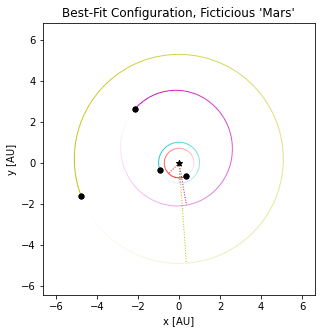

In [71]:
sim2 = rebound.Simulation()
sim2.units = ('AU', 'days', 'Msun')
sim2.add(m=1.0)
sim2.add(m=2.5452514806996778e-6, P=224.70077517395697,omega=calc_omega(3.7336627654746756e-5,-0.0003712889341763076),e=calc_ecc(3.7336627654746756e-5,-0.0003712889341763076))
sim2.add(m=3.10658703046874e-6, P=365.2564552605551,omega=calc_omega(3.7336627654746756e-5,-0.0003712889341763076),e=calc_ecc(0.013146866967261101,0.00172740634375595))
sim2.add(m=8.582495339894613e-5, P=1733.7614715994966,omega=calc_omega(3.7336627654746756e-5,-0.0003712889341763076),e=calc_ecc(0.26126214547436966,0.00860505790153028))
sim2.add(m=0.0007805546434104661, P=4202.849483362612,omega=calc_omega(3.7336627654746756e-5,-0.0003712889341763076),e=calc_ecc(0.013493684234908196,-0.03727854443469793))
sim2.integrate(100000)
# sim2.status()
op = rebound.OrbitPlot(sim2, unitlabel="[AU]", color=True, periastron=True)
os = sim2.calculate_orbits()
sim2.move_to_com()
plt.title("Best-Fit Configuration, Ficticious 'Mars'")
# plt.legend(handles=[("b","c","d","e")])

In [34]:
sim2.integrator = "whfast"
sim2.dt = 0.5 * os[1].P  # 5% of Io's period
Nout = 1000            # number of points to display
tmax = 1000000*365.25         # let the simulation run for N years

In [45]:
nplanets=4
x = np.zeros((nplanets,Nout))
y = np.zeros((nplanets,Nout))
ecc = np.zeros((nplanets,Nout))
longitude = np.zeros((nplanets,Nout))
omega = np.zeros((nplanets,Nout))
sma=np.zeros((nplanets,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim2.particles

for i,time in enumerate(times):
    sim2.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim2.calculate_orbits()
    for j in range(nplanets):
        x[j][i] = ps[j+1].x 
        y[j][i] = ps[j+1].y 
        ecc[j][i] = os[j].e
        sma[j][i] = os[j].a
        longitude[j][i] = os[j].l
        omega[j][i] = os[j].omega
#         varpi[j][i] = os[j].Omega + os[j].omega

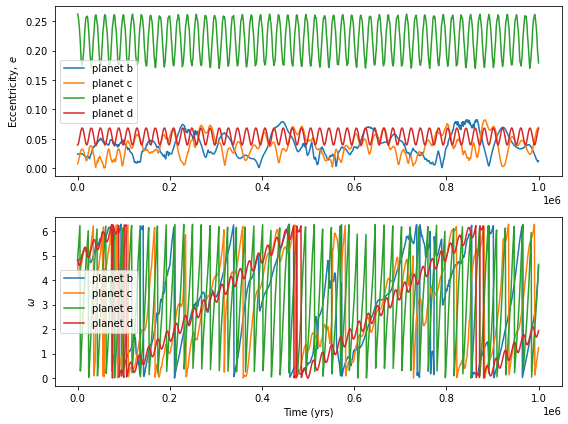

In [53]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
plt.plot(times/365.25,ecc[0],label="planet b")
plt.plot(times/365.25,ecc[1],label="planet c")
plt.plot(times/365.25,ecc[2],label="planet e")
plt.plot(times/365.25,ecc[3],label="planet d")
# ax1.set_xlabel("Time (yrs)")
ax1.set_ylabel("Eccentricity, $e$")
# ax1.set_xlim(0,10000)
plt.legend();
# ax2 = plt.subplot(312,sharex=ax1)
# plt.plot(times/365.25,sma[0],label="planet b")
# plt.plot(times/365.25,sma[1],label="planet c")
# plt.plot(times/365.25,sma[2],label="planet e")
# plt.plot(times/365.25,sma[3],label="planet d")
# ax2.set_xlabel("Time (yrs)")
ax3 = plt.subplot(212)
plt.plot(times/365.25,omega[0],label="planet b")
plt.plot(times/365.25,omega[1],label="planet c")
plt.plot(times/365.25,omega[2],label="planet e")
plt.plot(times/365.25,omega[3],label="planet d")
plt.legend();
ax3.set_xlabel("Time (yrs)")
ax3.set_ylabel("$ω$")
fig.tight_layout()

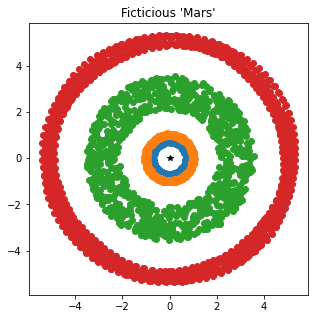

In [52]:
fig=plt.figure(figsize=(5,5))
plt.title("Ficticious 'Mars'")
plt.plot(0,0, marker='*', color = "k")
plt.scatter(x[0],y[0],label="planet b")
plt.scatter(x[1],y[1],label="planet c")
plt.scatter(x[2],y[2],label="planet e")
plt.scatter(x[3],y[3],label="planet d")

/opt/anaconda3/lib/python3.9/site-packages/rebound/simulation.py:1033: RuntimeWarning: WHFast convergence issue. Timestep is larger than at least one orbital period.
  warnings.warn(msg[1:], RuntimeWarning)
/var/folders/zr/tkhyjcmx4nz38cdkm50wgz3c0000gn/T/ipykernel_11325/569921383.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,5))


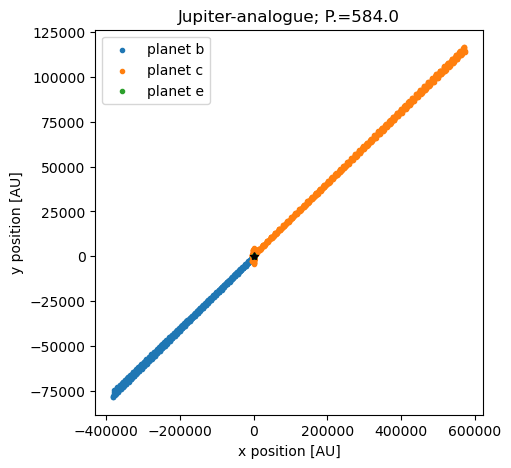

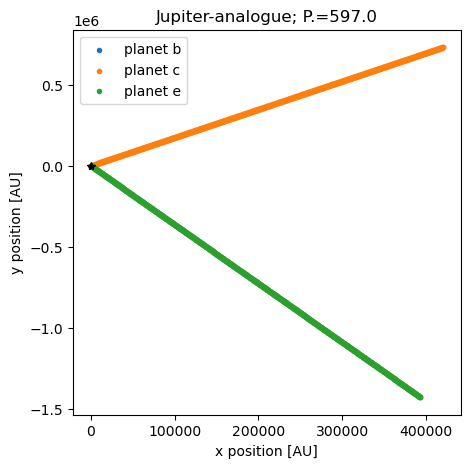

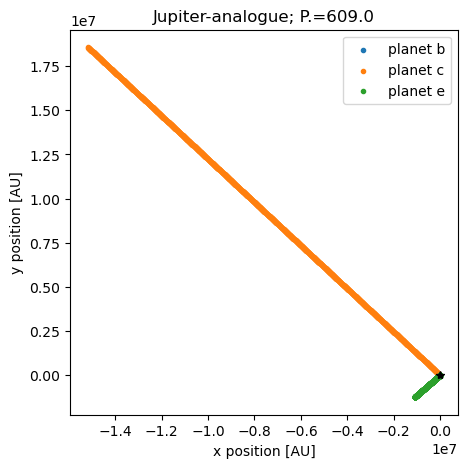

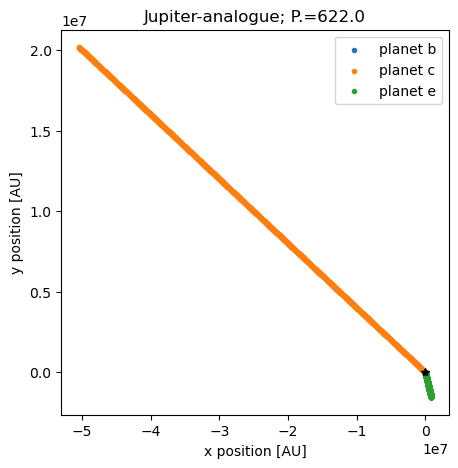

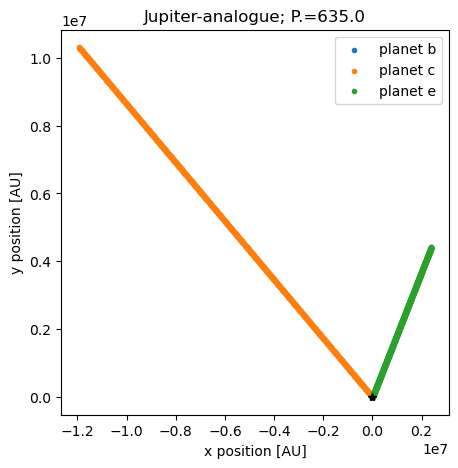

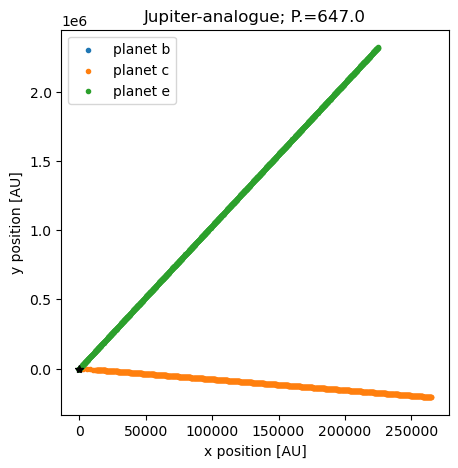

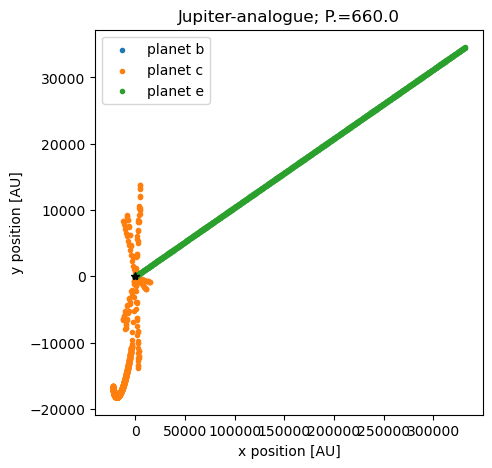

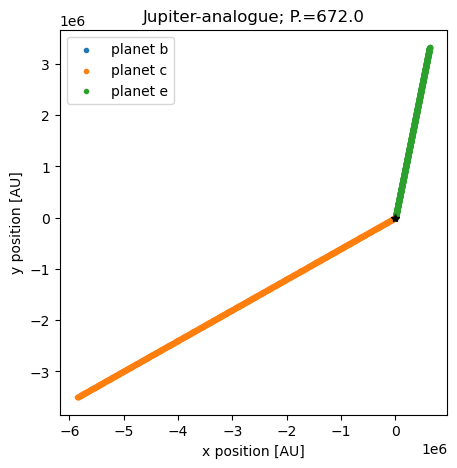

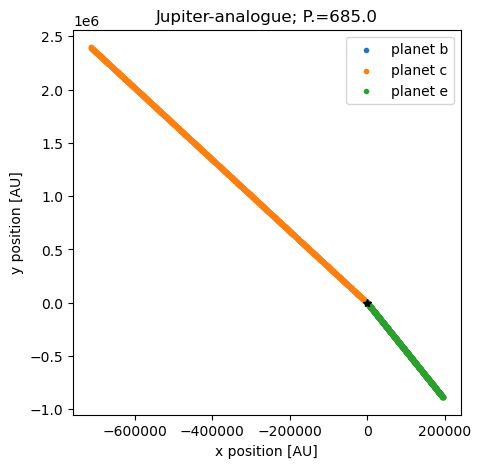

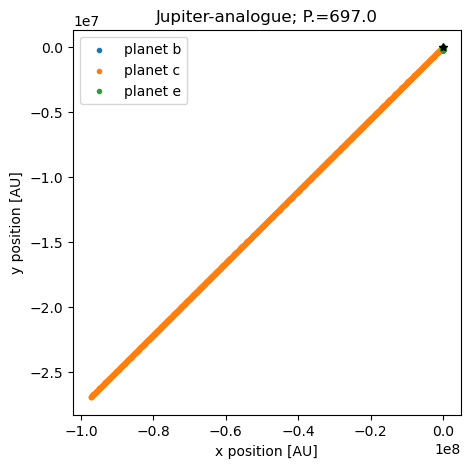

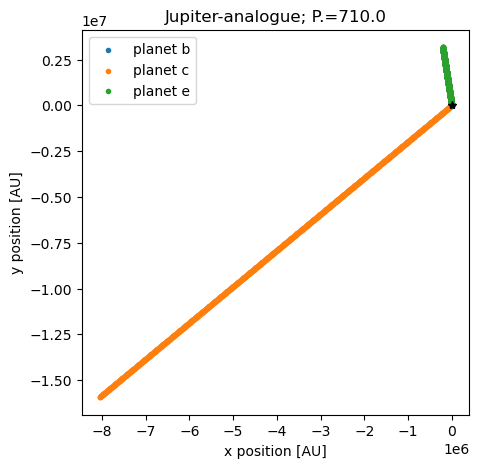

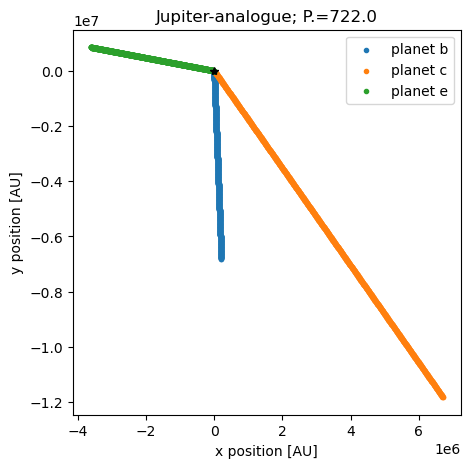

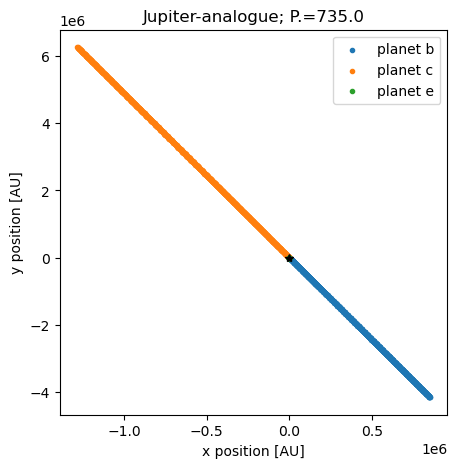

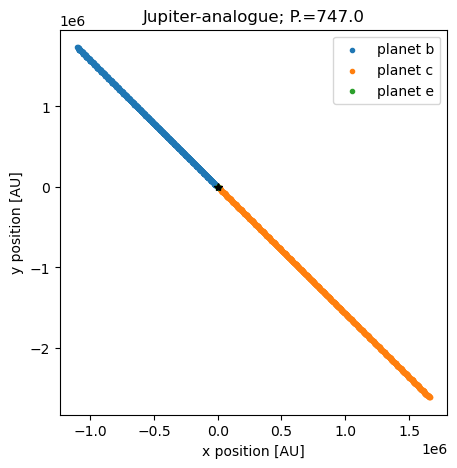

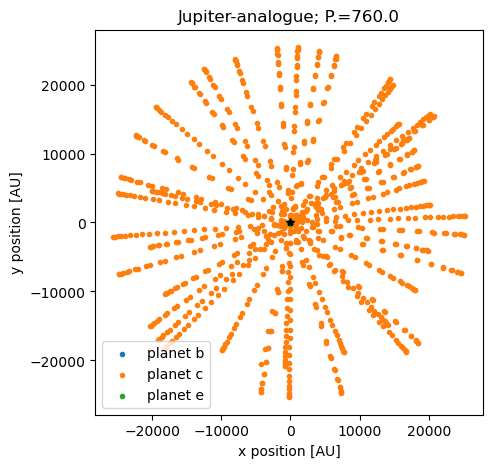

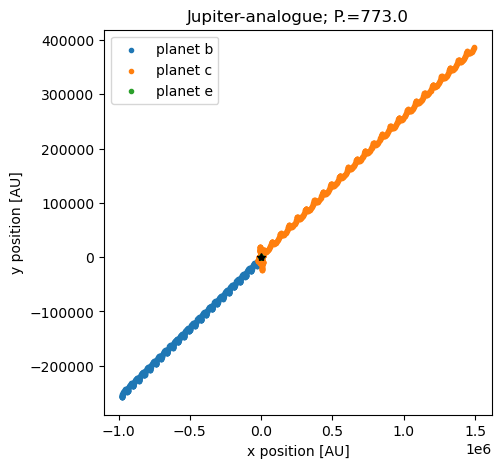

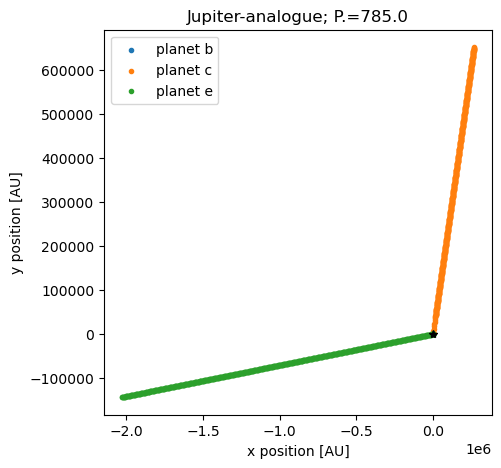

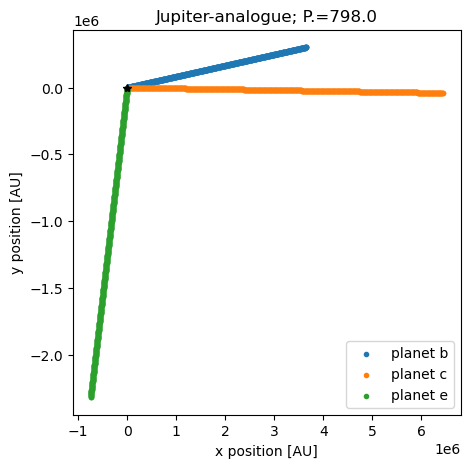

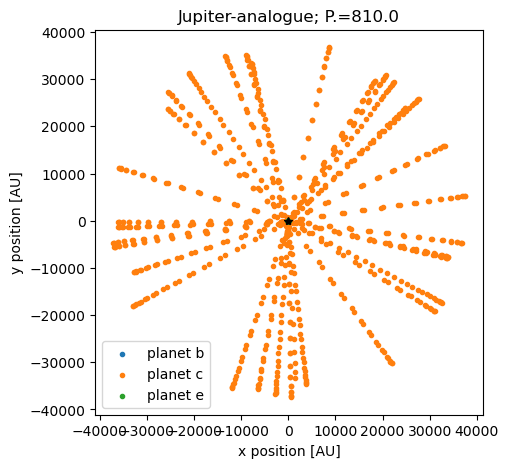

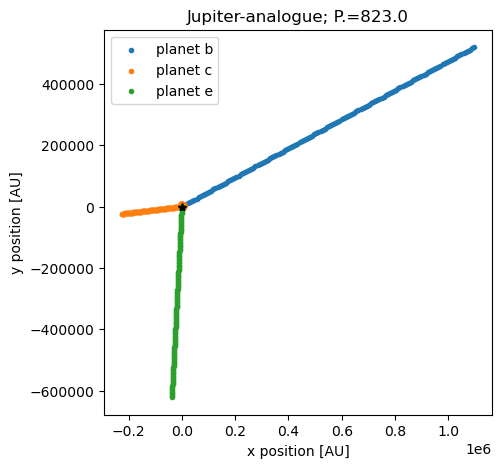

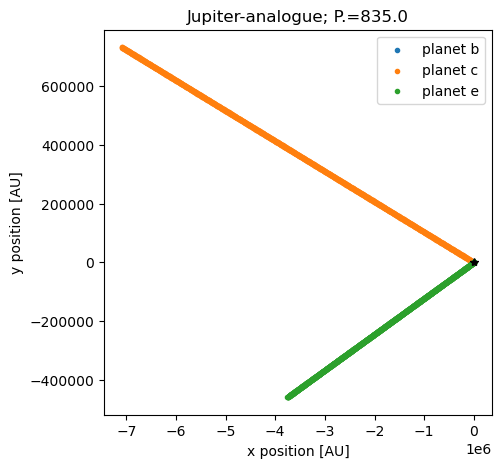

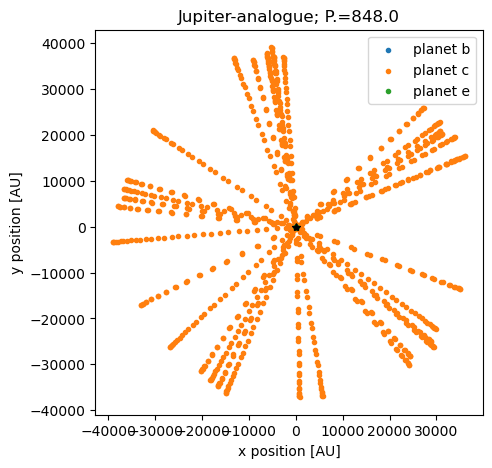

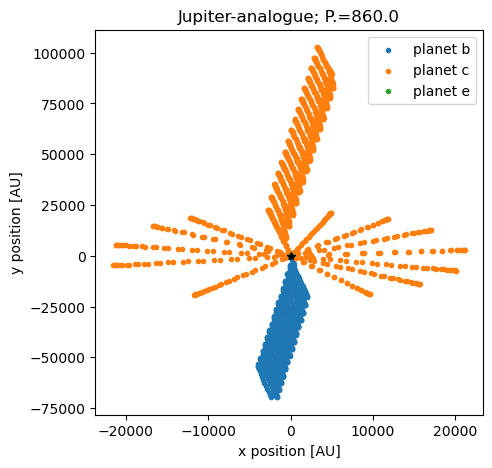

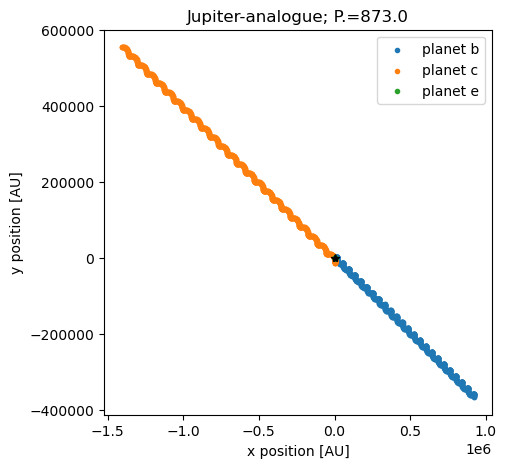

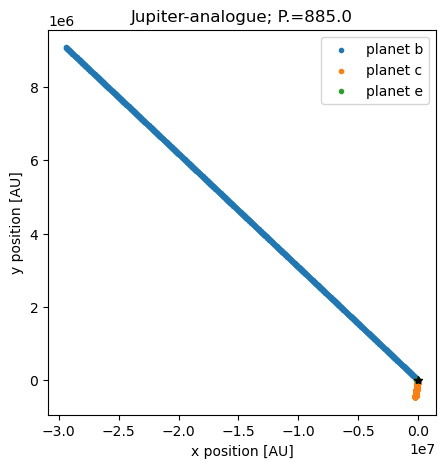

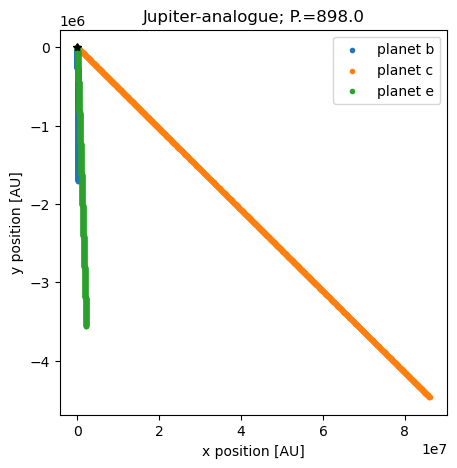

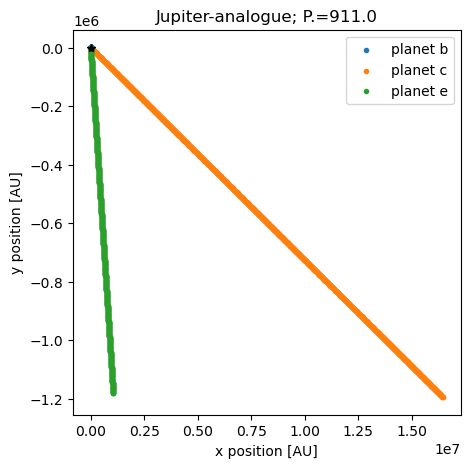

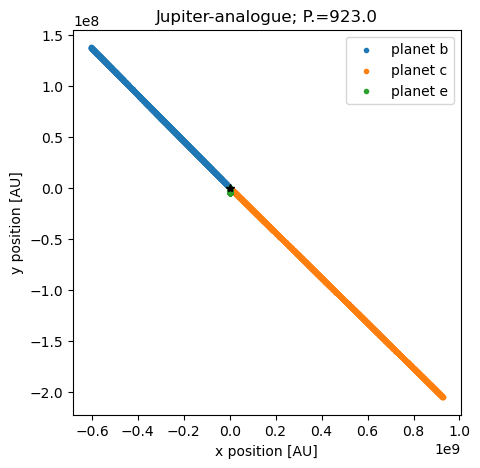

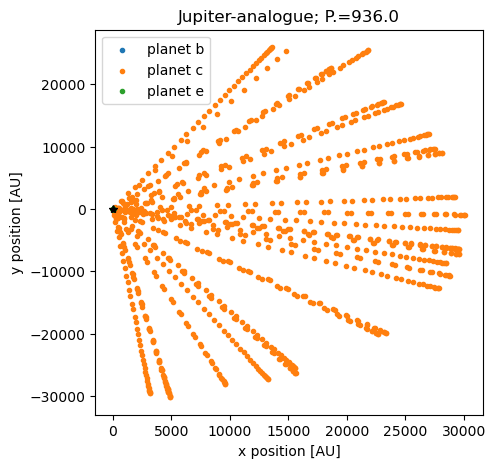

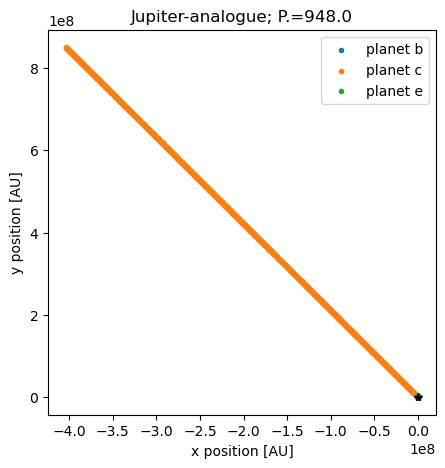

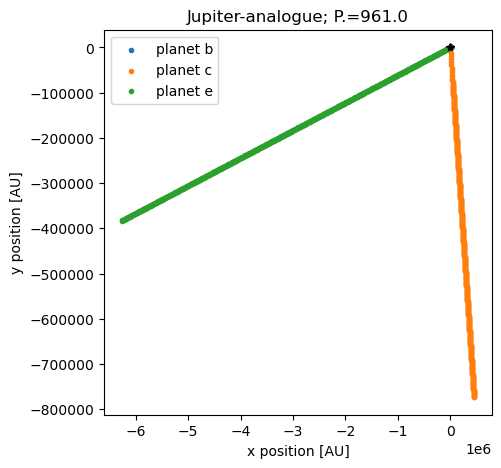

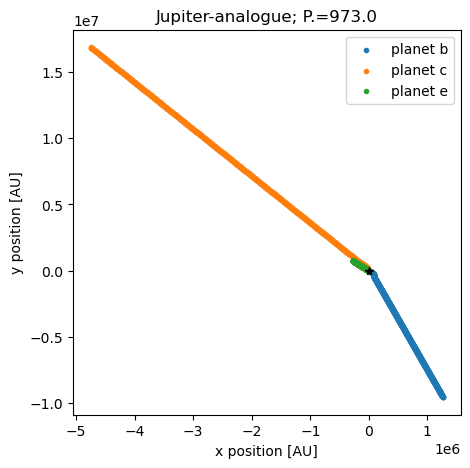

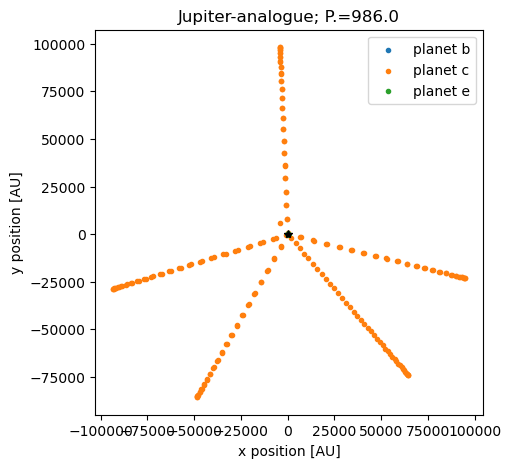

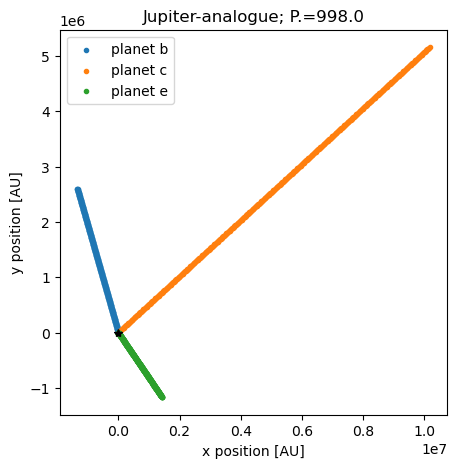

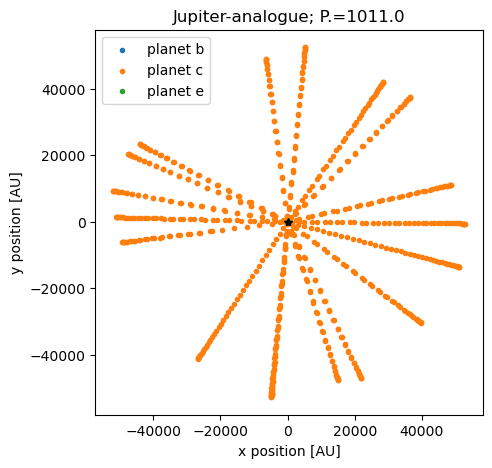

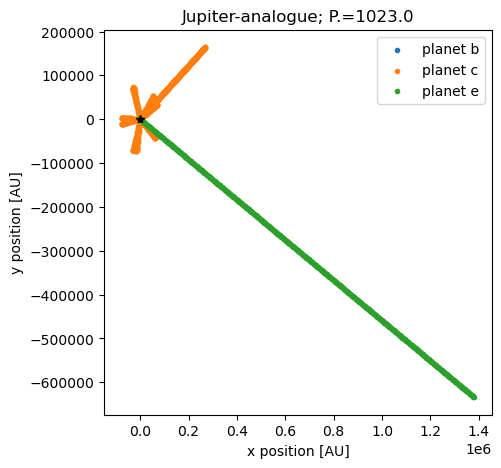

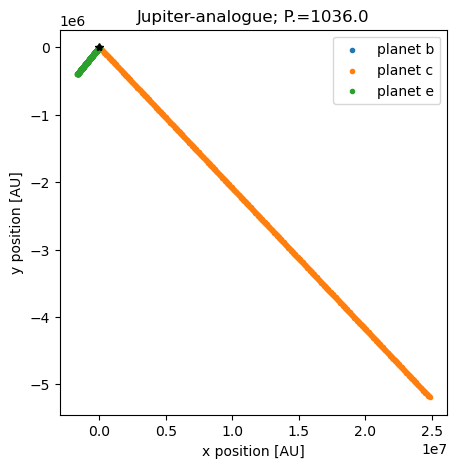

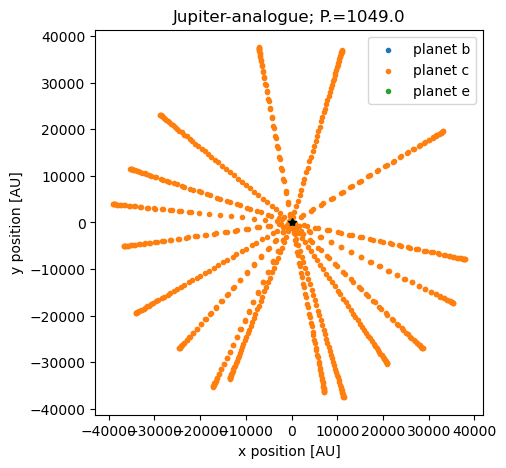

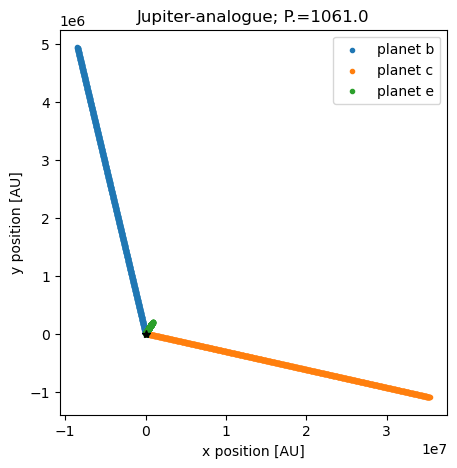

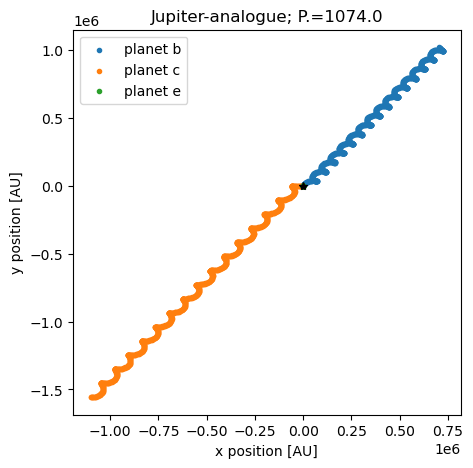

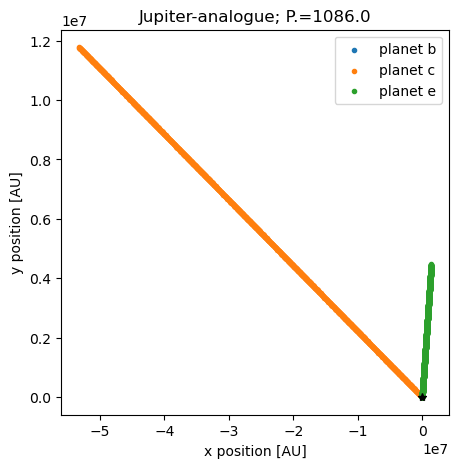

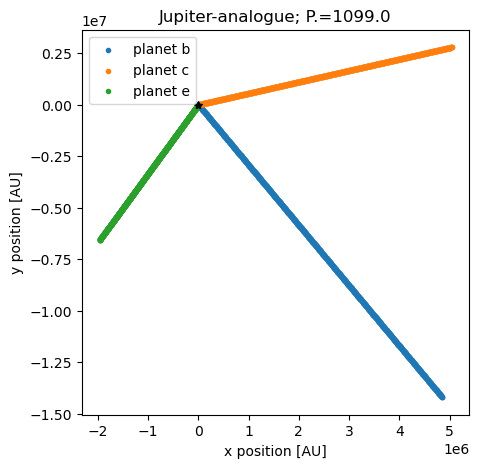

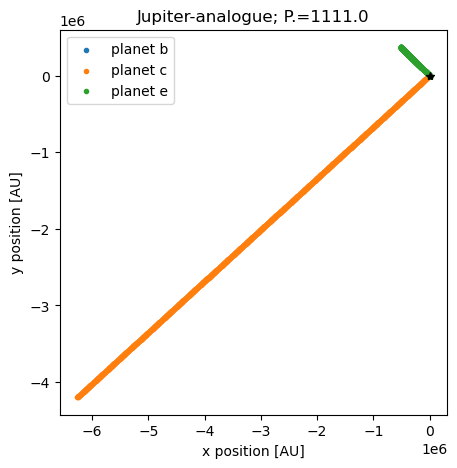

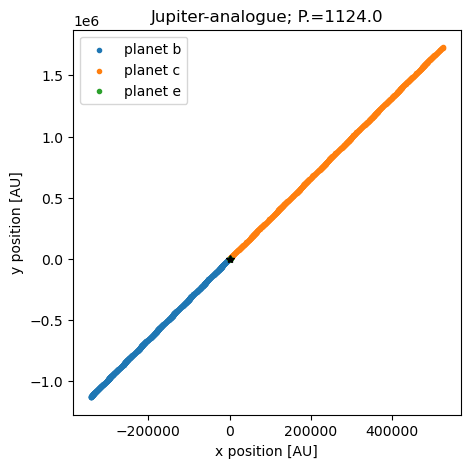

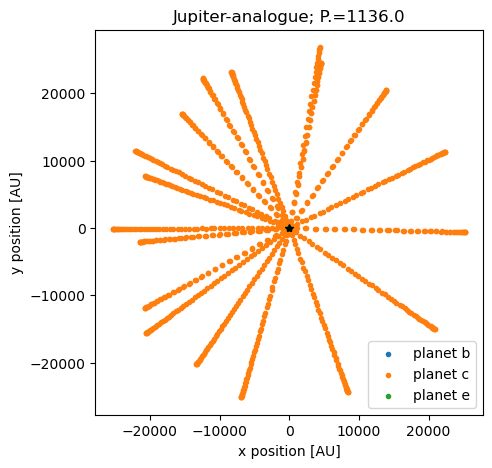

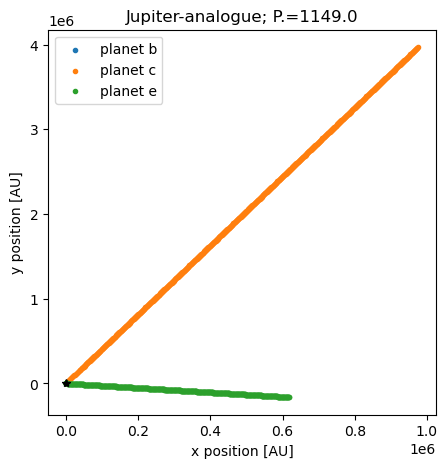

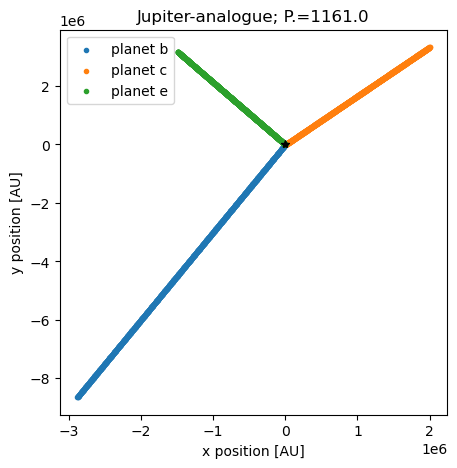

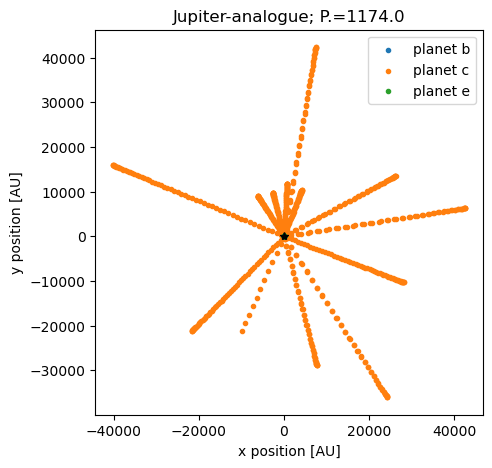

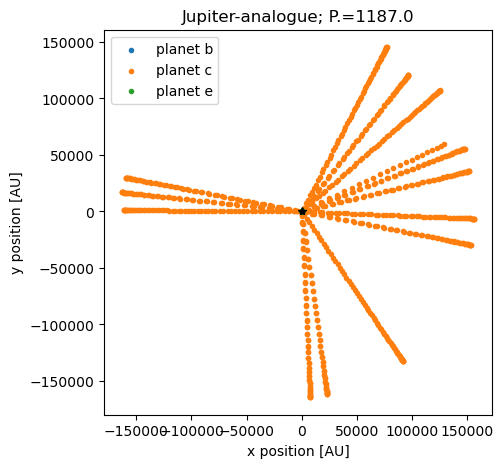

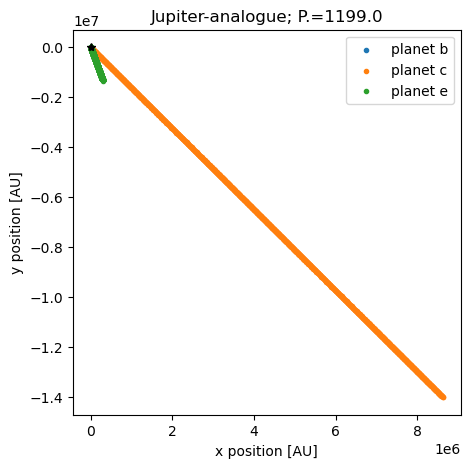

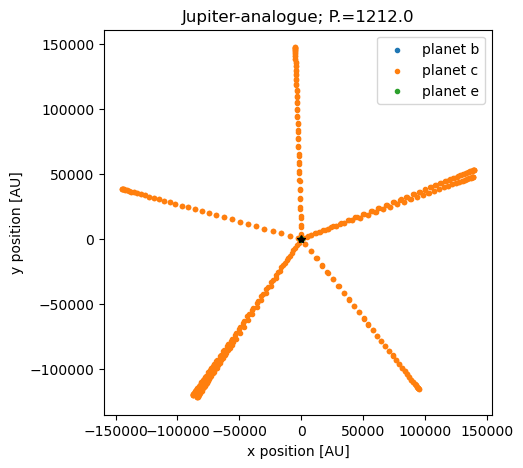

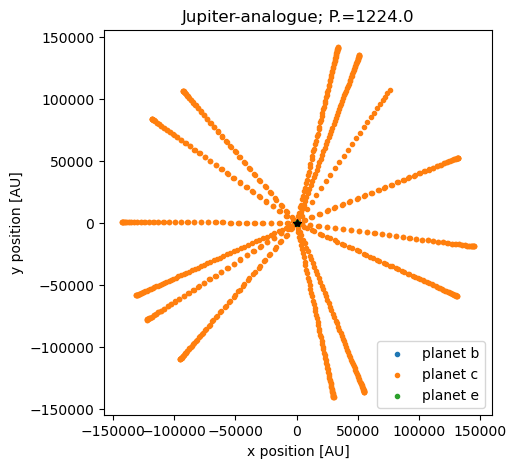

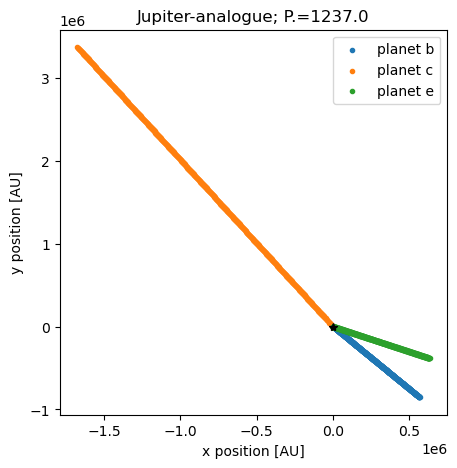

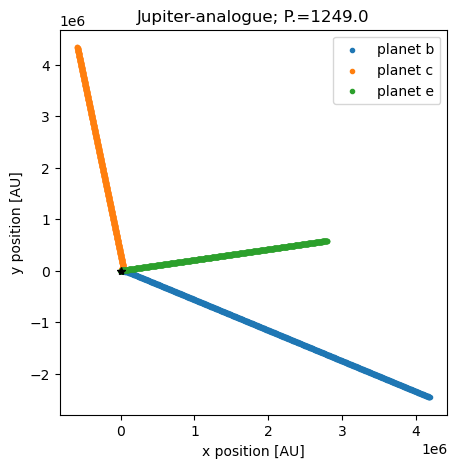

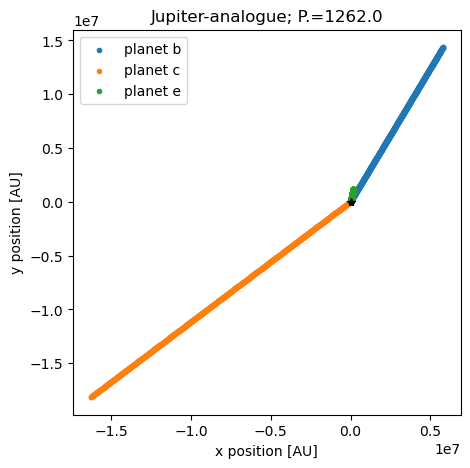

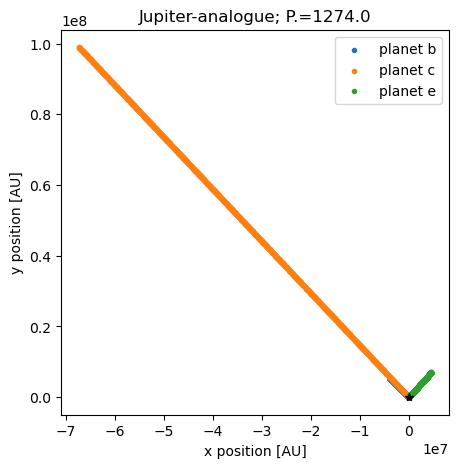

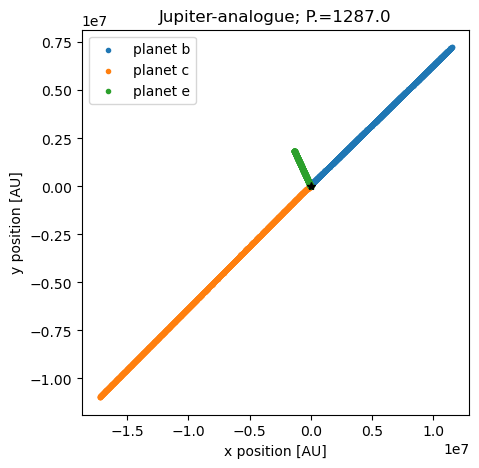

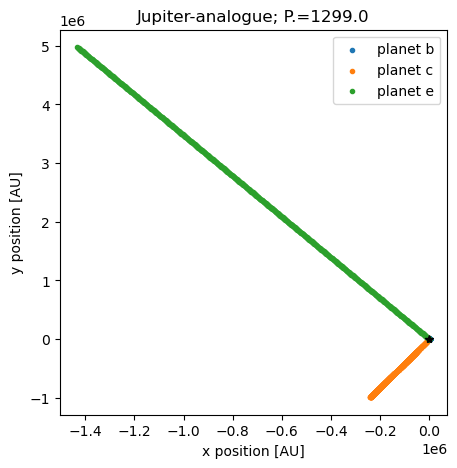

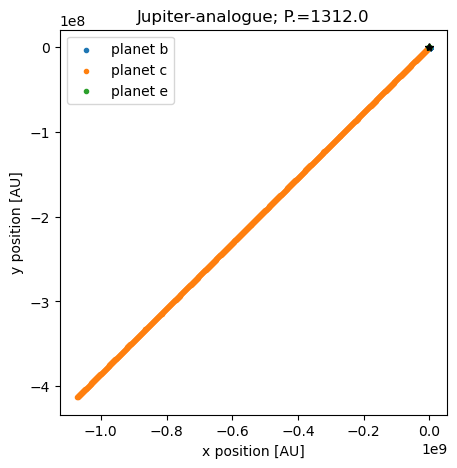

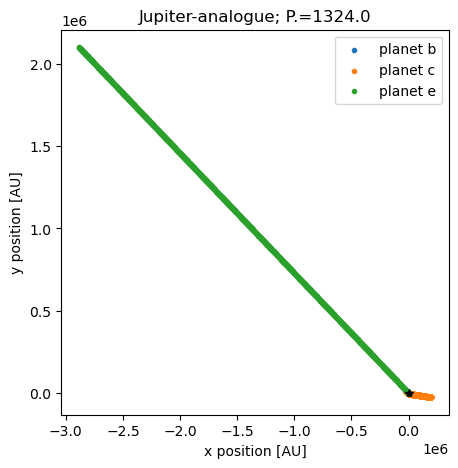

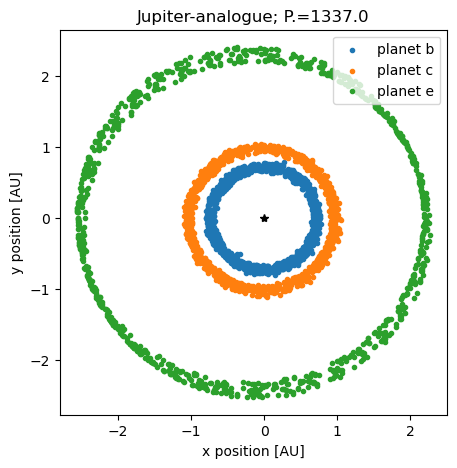

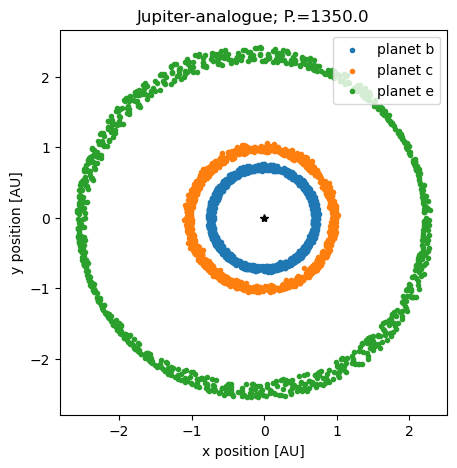

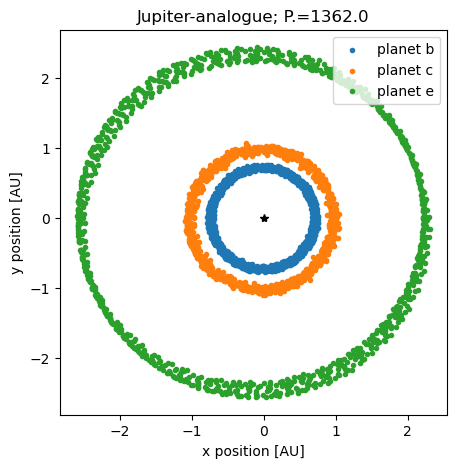

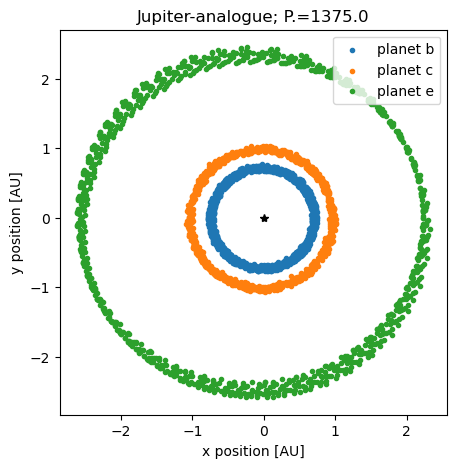

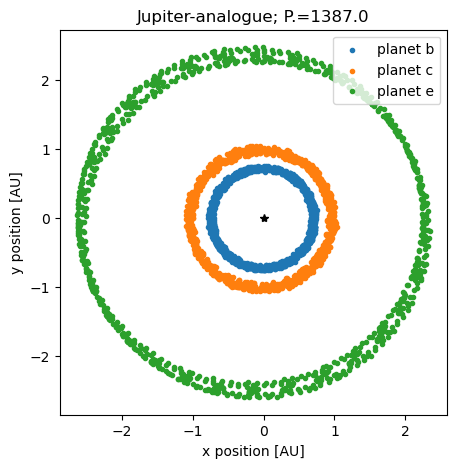

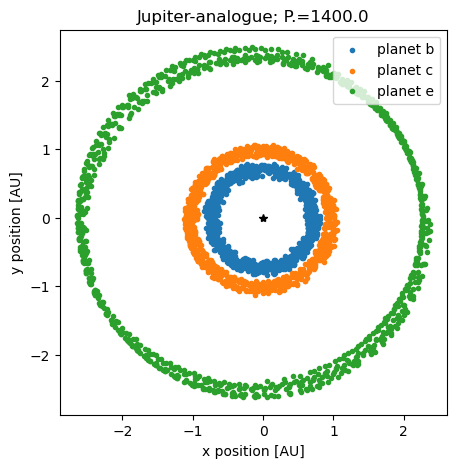

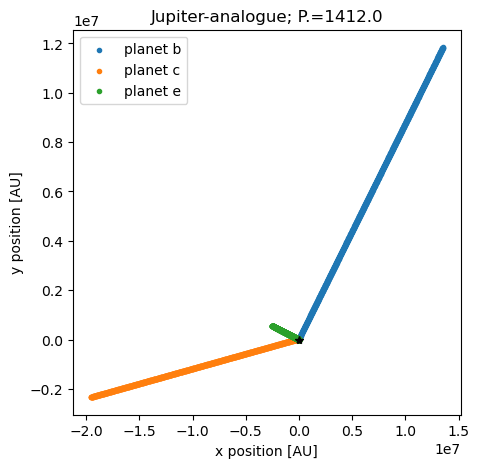

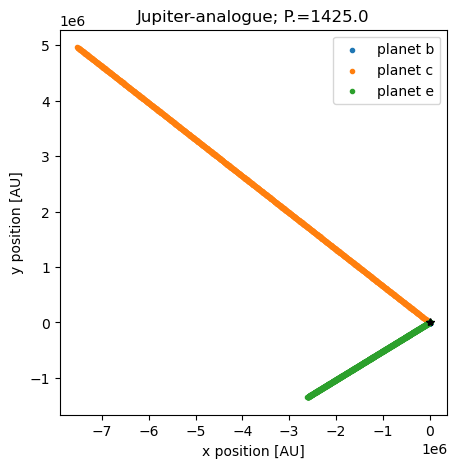

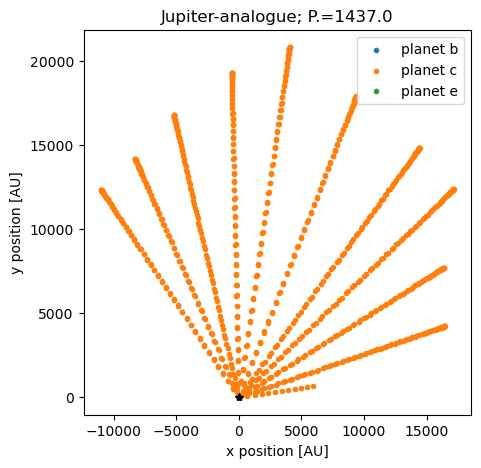

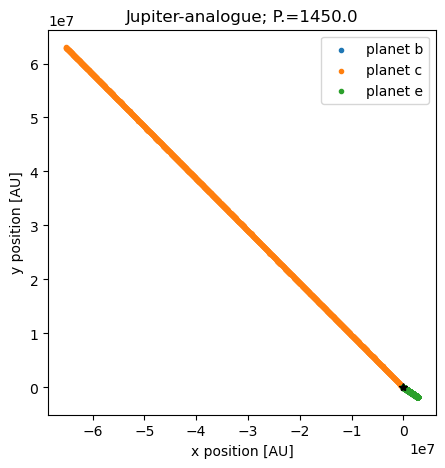

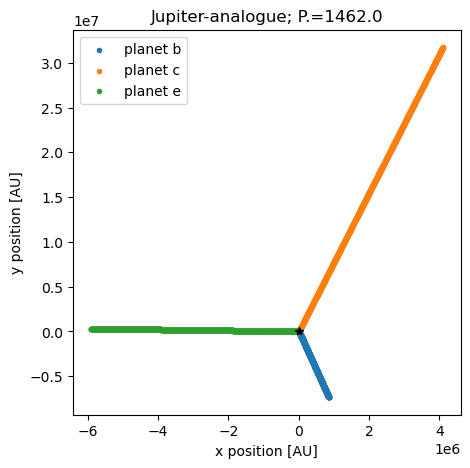

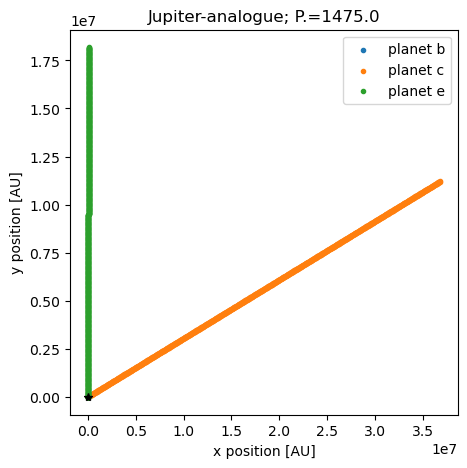

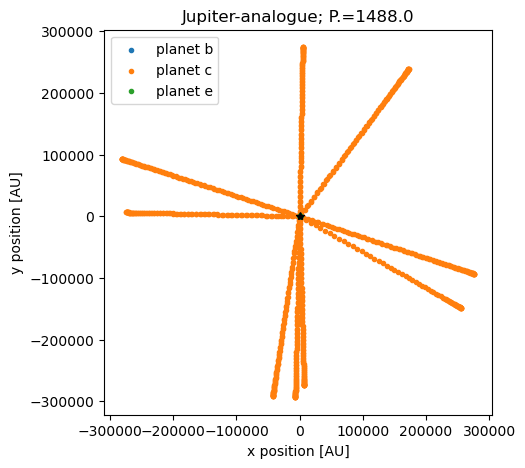

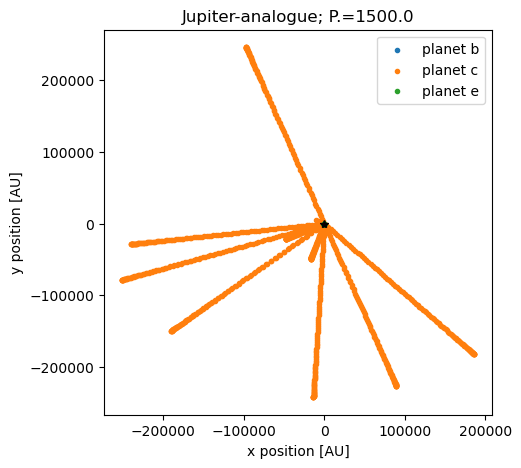

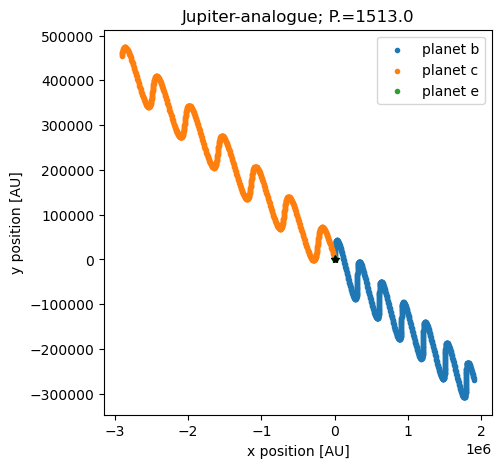

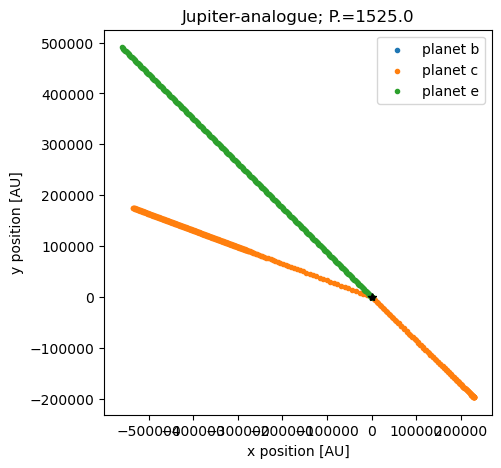

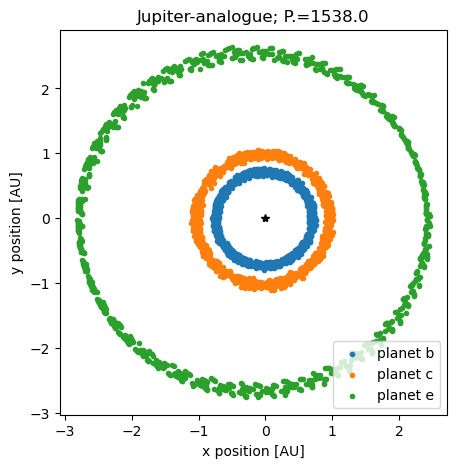

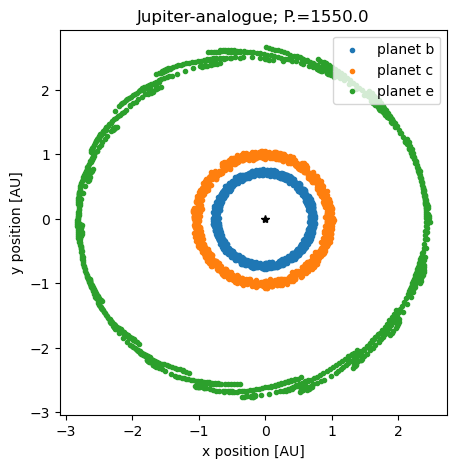

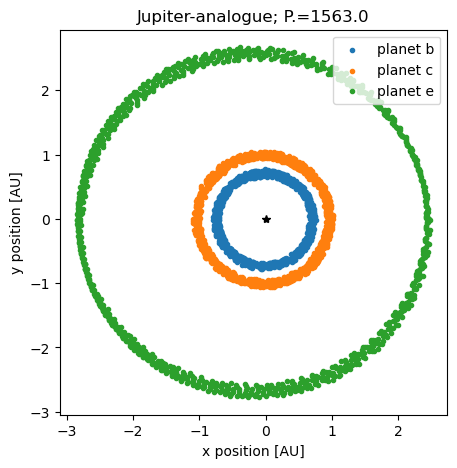

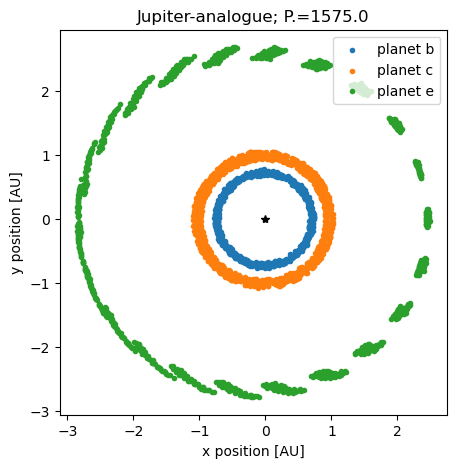

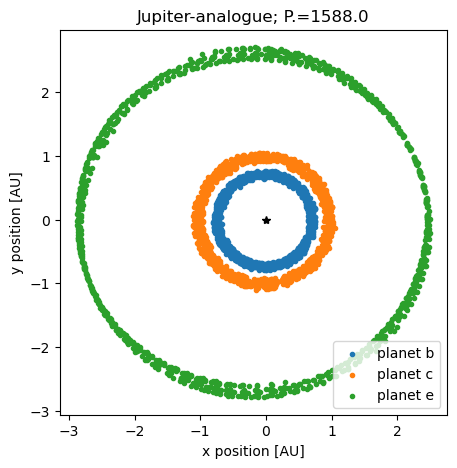

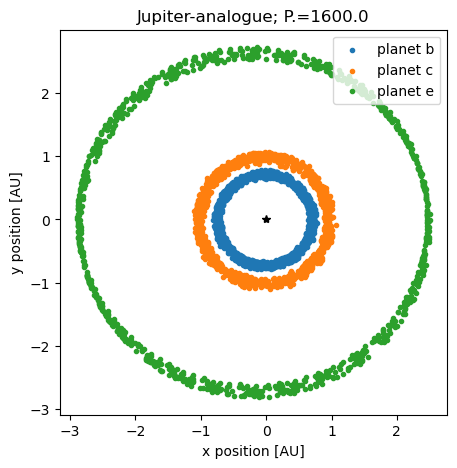

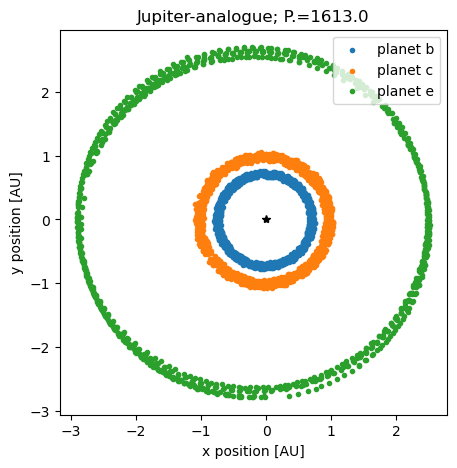

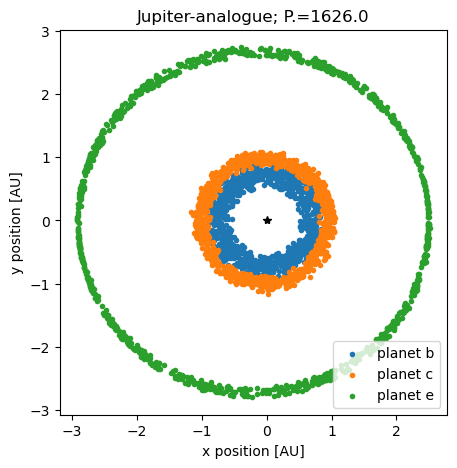

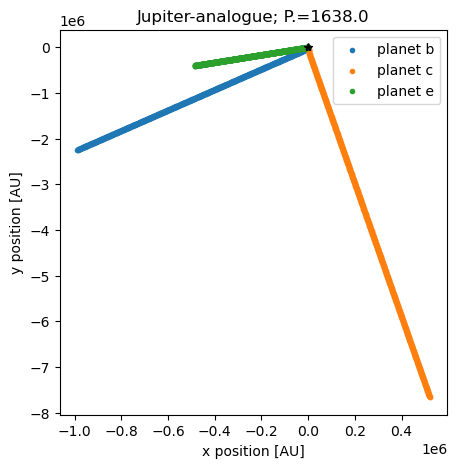

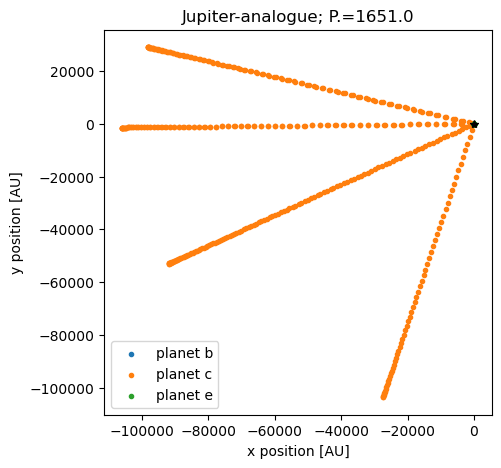

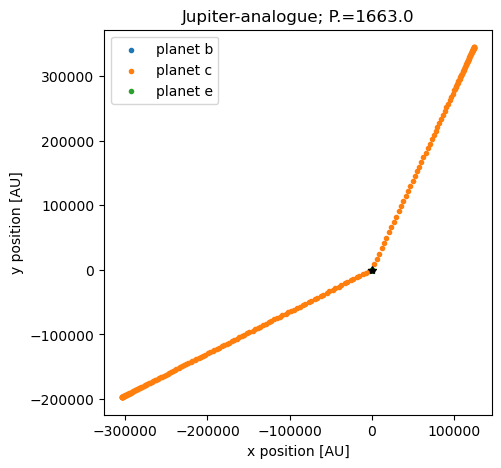

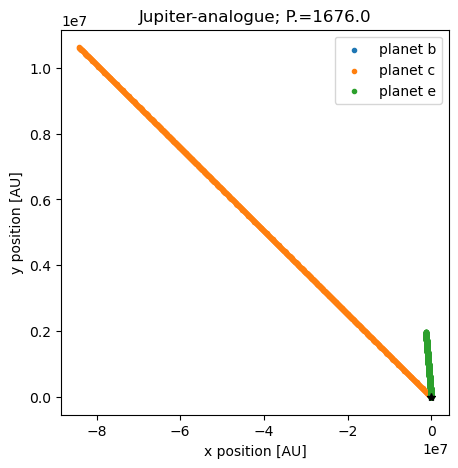

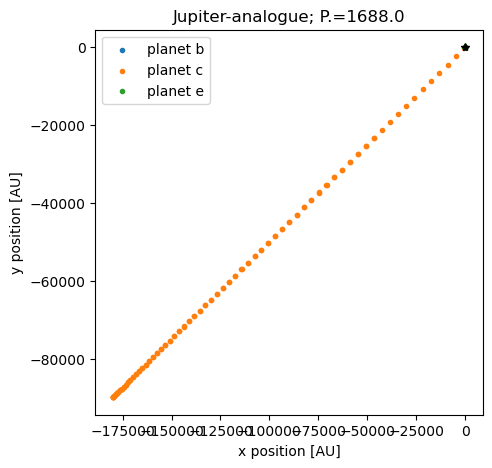

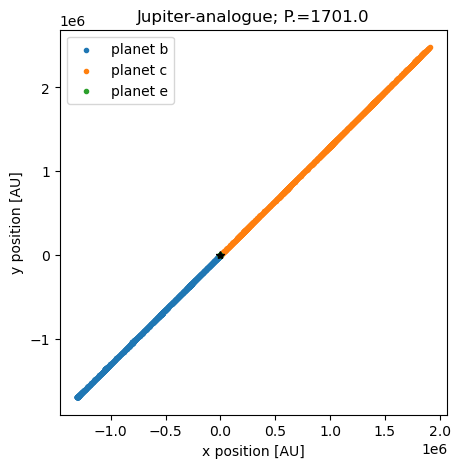

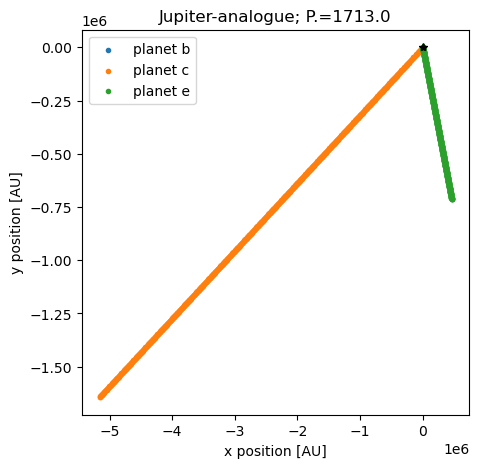

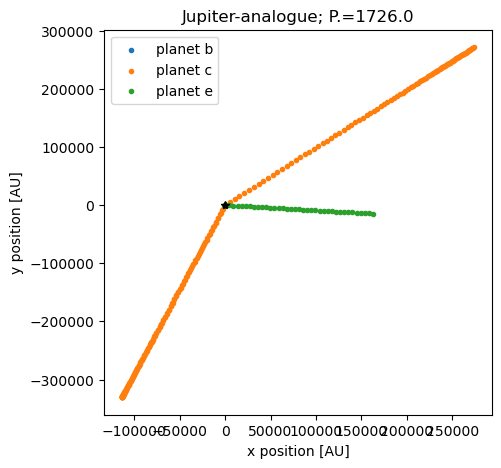

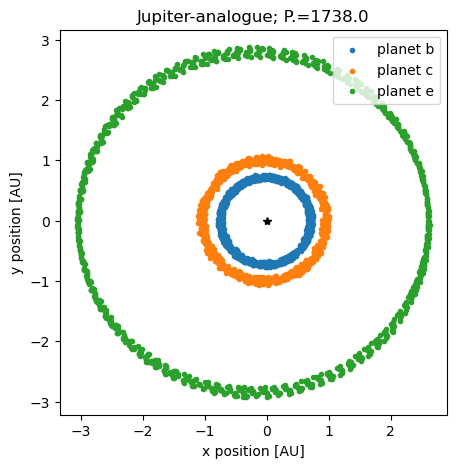

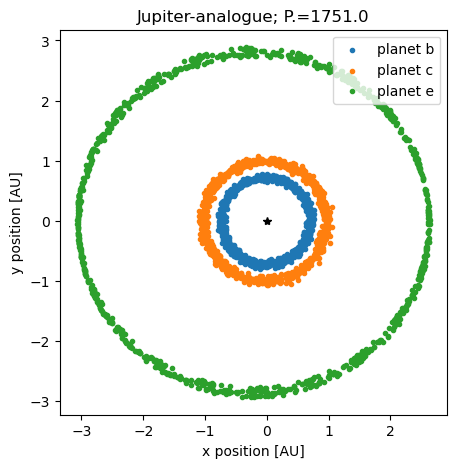

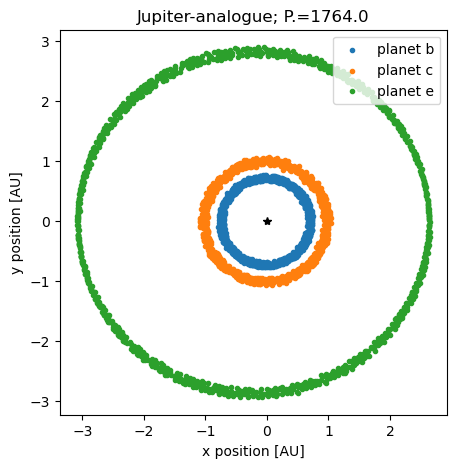

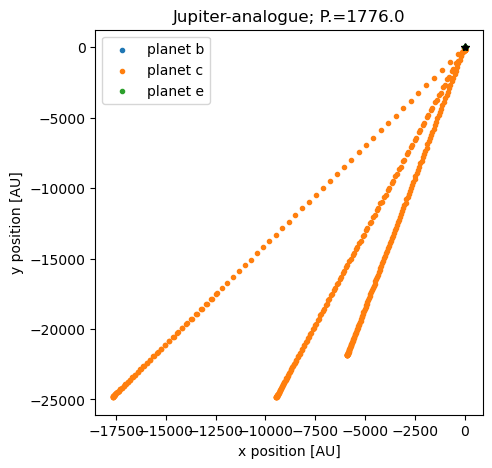

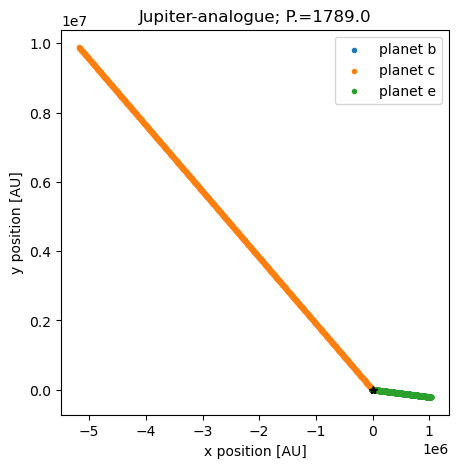

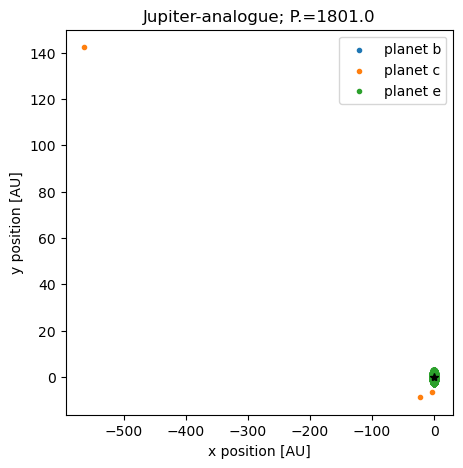

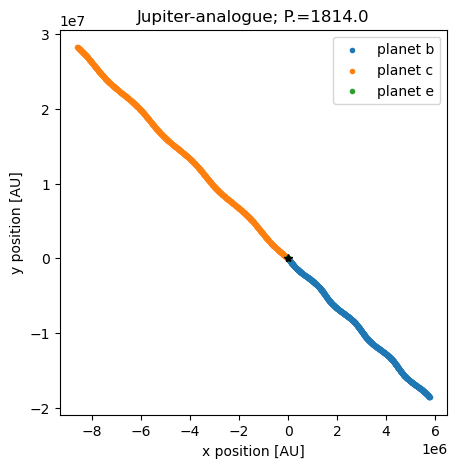

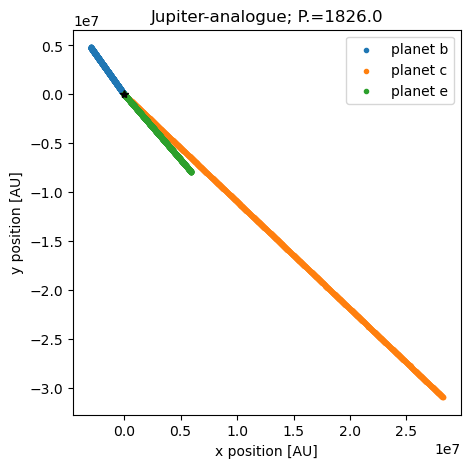

In [14]:
periods=np.linspace(584.4, 1826.25,100)
def Find_MinJup(P3):
    Noutputs=1000
    times = np.linspace(0,1000000*365.25,Noutputs)
    x = np.zeros((3,Noutputs))
    y = np.zeros((3,Noutputs))
    z = np.zeros((3,Noutputs))
    sim = rebound.Simulation()
    sim.units = ('AU', 'days', 'Msun')
    sim.add(m=1.0)
    sim.add(m=4.2918e-6,P=224.70077517395697,omega=calc_omega(-0.027,-0.039),e=calc_ecc(-0.027,-0.039))
    sim.add(m=2.8450e-6,P=365.2564552605551,omega=calc_omega(-0.00461,-0.02945),e=calc_ecc(-0.00461,-0.02945))
    sim.add(m=0.001, P=P3,omega=calc_omega(-0.07663,0.02077),e=calc_ecc(-0.07663,0.02077))
    sim.integrator = "whfast"
    os = sim.calculate_orbits()
    sim.dt = 0.5 * os[1].P
    sim.move_to_com()
    particles = sim.particles
    for i,time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        x[0][i] = particles[1].x
        y[0][i] = particles[1].y
        x[1][i] = particles[2].x
        y[1][i] = particles[2].y
        x[2][i] = particles[3].x
        y[2][i] = particles[3].y

    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    plt.title("Jupiter-analogue; P.="+ str(np.round(P3)))
    plt.plot(0,0, marker='*', color = "k")
    plt.scatter(x[0],y[0], marker='.', label = "planet b");
    plt.scatter(x[1],y[1], marker='.', label = "planet c");
    plt.scatter(x[2],y[2], marker='.', label = "planet d");
    plt.legend()
    plt.xlabel("x position [AU]")
    plt.ylabel("y position [AU]")

for per in periods:
    Find_MinJup(per)

In [3]:
eccentricities = np.linspace(0.15,0.3,100) #ignore warning
def RunSim_Find_eccInst(ecc_p3):
    Noutputs = 10000
    times = np.linspace(0,1000000*365.25,Noutputs)
    x = np.zeros((4,Noutputs))
    y = np.zeros((4,Noutputs))
    z = np.zeros((4,Noutputs))
    sim = rebound.Simulation()
    sim.units = ('AU', 'days', 'Msun')
    sim.add(m=1.0)
    sim.add(m=2.5452514806996778e-6, P=224.70077517395697,omega=calc_omega(3.7336627654746756e-5,-0.0003712889341763076),e=calc_ecc(3.7336627654746756e-5,-0.0003712889341763076))
    sim.add(m=3.10658703046874e-6, P=365.2564552605551,omega=calc_omega(3.7336627654746756e-5,-0.0003712889341763076),e=calc_ecc(0.013146866967261101,0.00172740634375595))
    sim.add(m=8.582495339894613e-5, P=1733.7614715994966,e=ecc_p3)
    sim.add(m=0.0007805546434104661, P=4202.849483362612,omega=calc_omega(3.7336627654746756e-5,-0.0003712889341763076),e=calc_ecc(0.013493684234908196,-0.03727854443469793))
    sim.integrator = "whfast"
    sim.dt = 0.5 * os[1].P
    sim.move_to_com()
    particles = sim.particles
    for i,time in enumerate(times):
        sim.integrate(time, exact_finish_time=0)
        x[0][i] = particles[1].x
        y[0][i] = particles[1].y
        x[1][i] = particles[2].x
        y[1][i] = particles[2].y
        x[2][i] = particles[3].x
        y[2][i] = particles[3].y
        x[3][i] = particles[4].x
        y[3][i] = particles[4].y

    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    plt.title("Ficticious 'Mars'; Ecc.="+ str(np.round(ecc_p3)))
    plt.plot(0,0, marker='*', color = "k")
    plt.scatter(x[0],y[0], marker='.', label = "planet b");
    plt.scatter(x[1],y[1], marker='.', label = "planet c");
    plt.scatter(x[2],y[2], marker='.', label = "planet e");
    plt.scatter(x[3],y[3], marker='.', label = "planet d");
#     plt.plot(x[2],x[2],color="black",alpha=0.5)
#     plt.ylim((-0.5,0.5))
#     plt.xlim((-0.5,0.5))
    plt.legend()
    plt.xlabel("x position [AU]")
    plt.ylabel("y position [AU]")

/var/folders/zr/tkhyjcmx4nz38cdkm50wgz3c0000gn/T/ipykernel_17958/3246487368.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5,5))


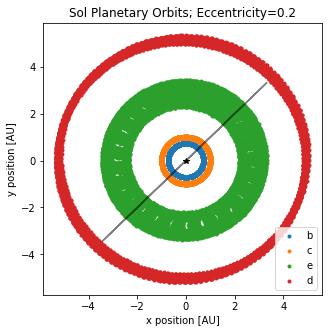

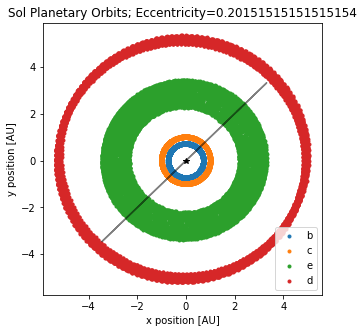

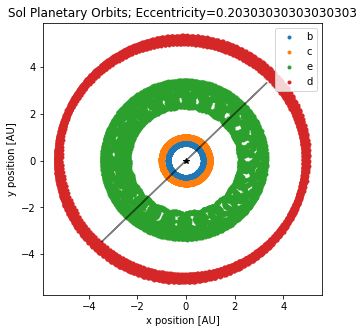

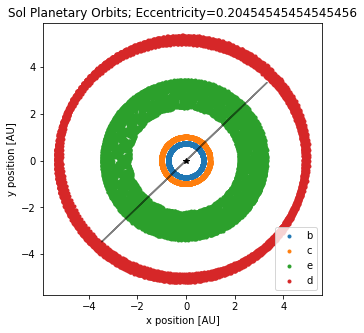

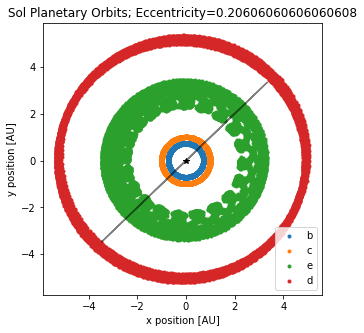

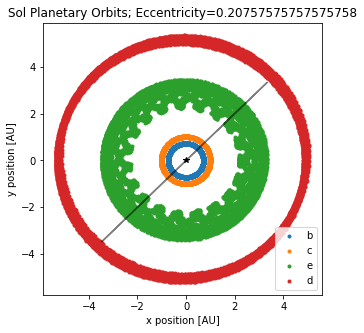

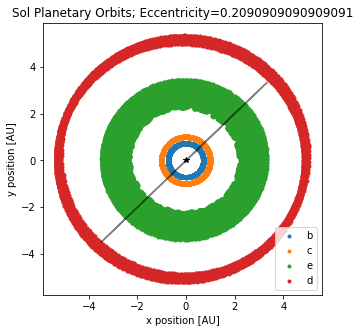

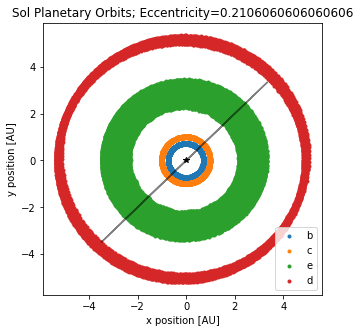

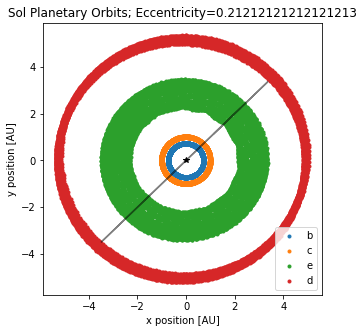

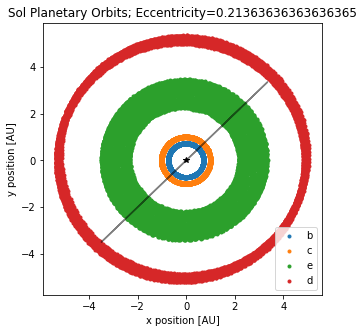

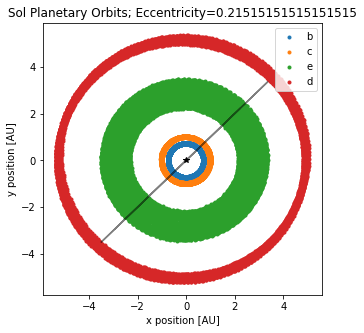

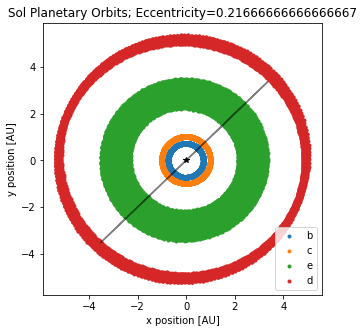

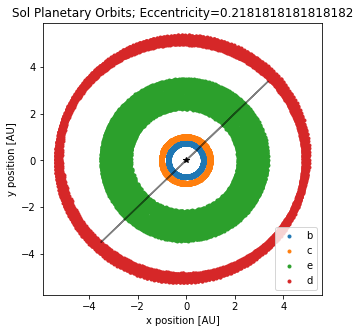

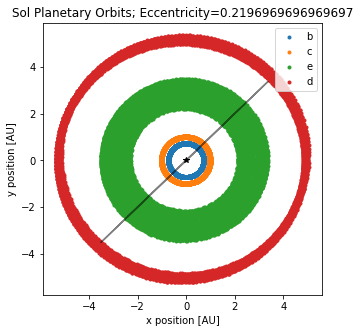

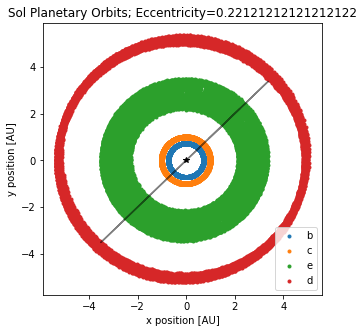

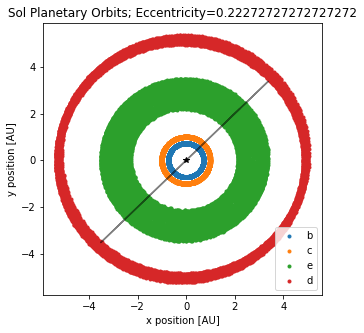

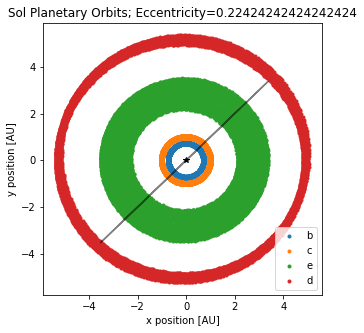

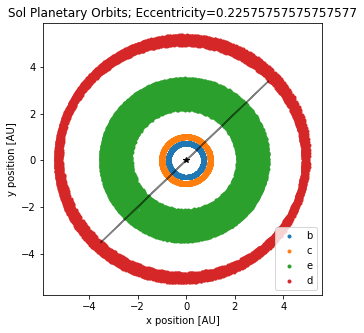

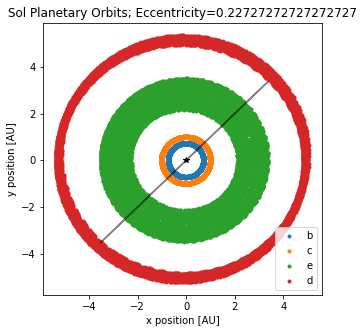

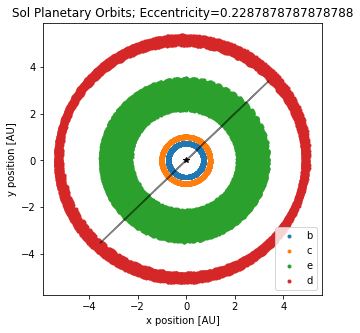

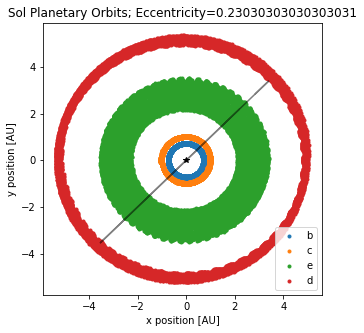

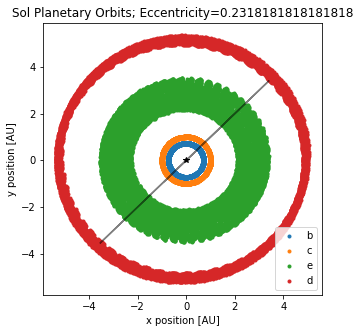

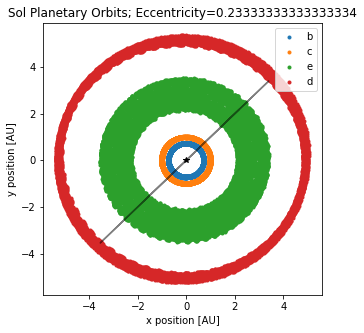

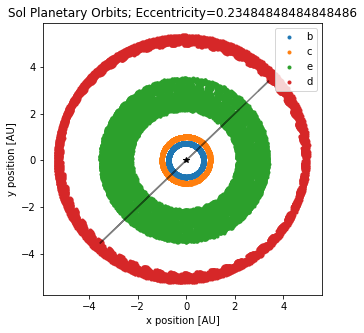

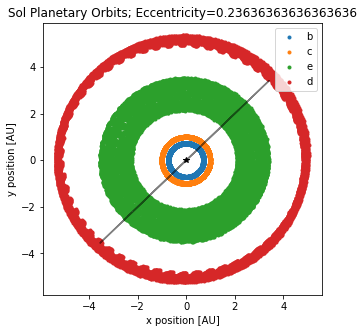

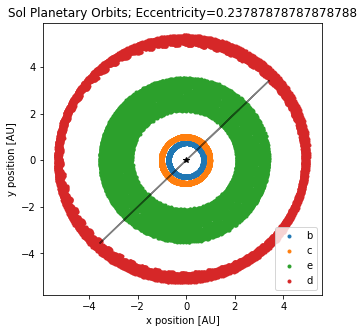

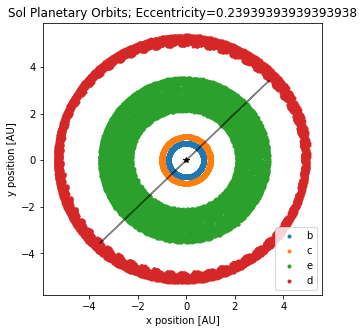

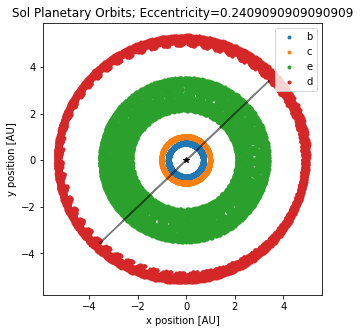

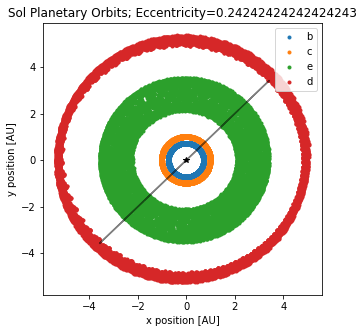

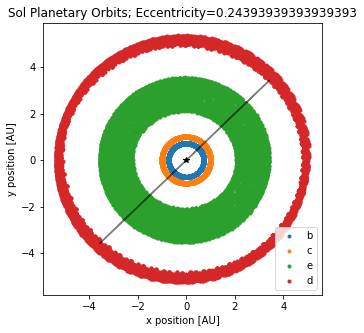

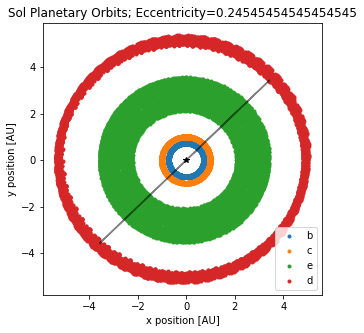

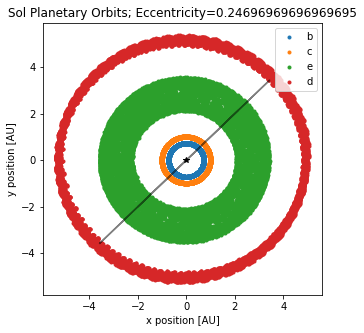

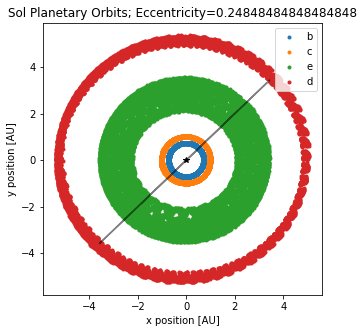

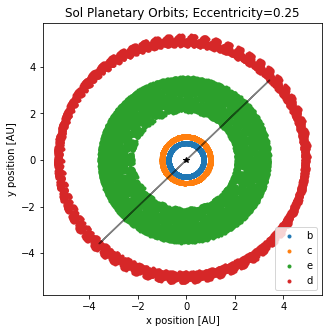

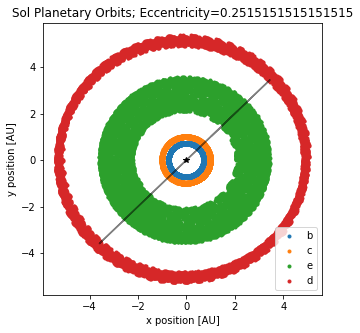

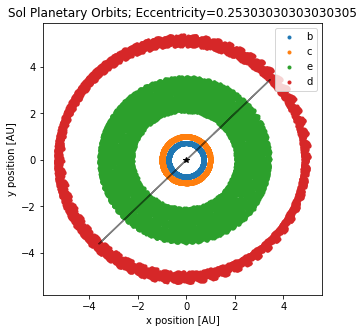

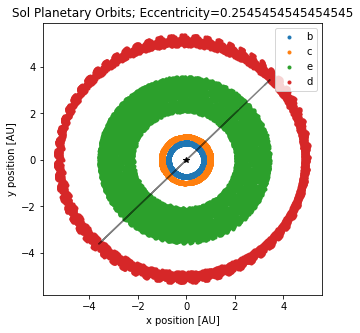

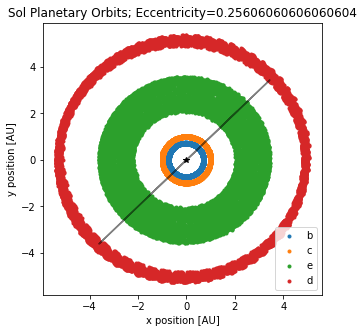

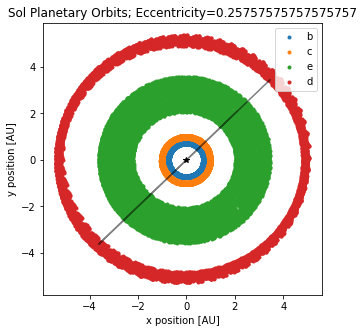

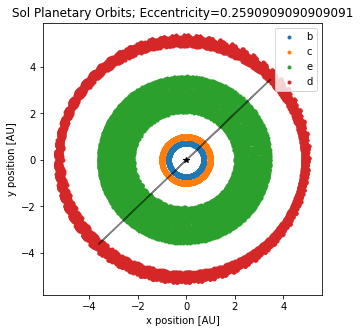

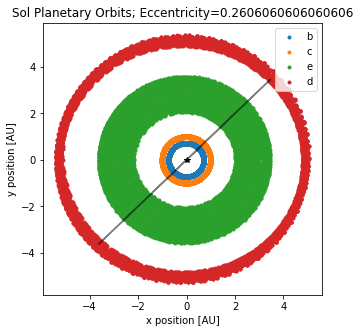

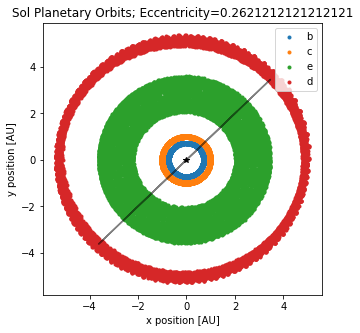

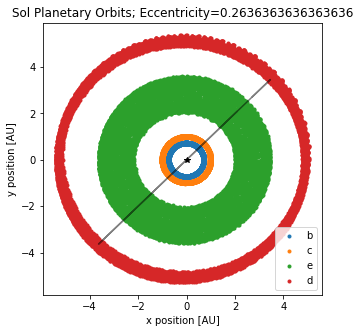

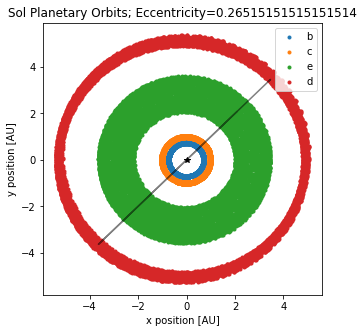

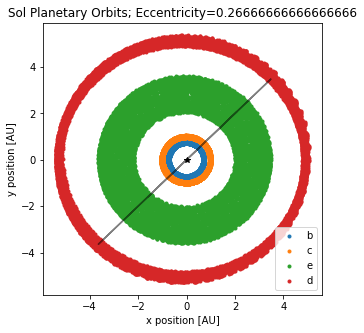

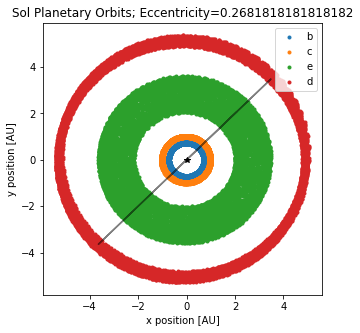

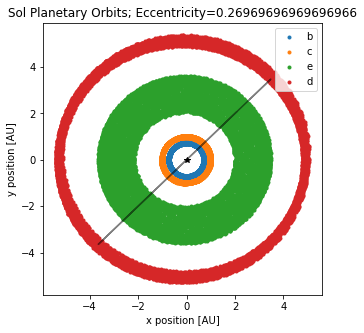

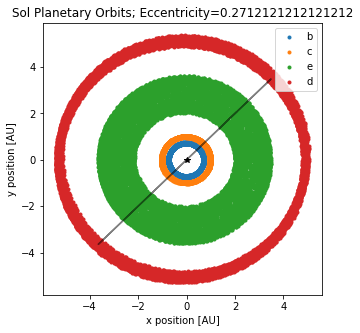

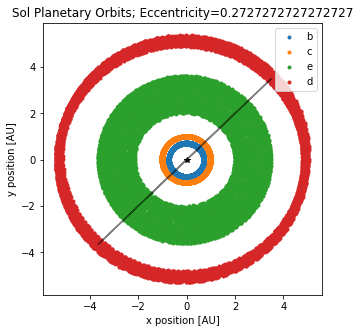

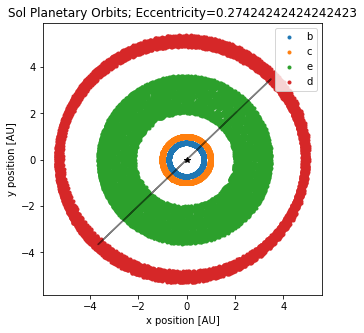

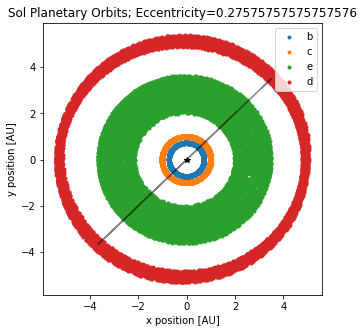

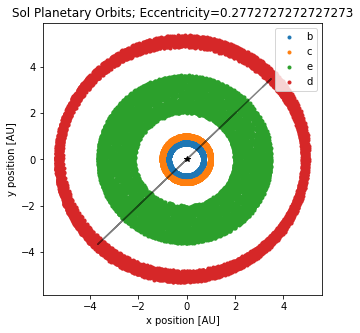

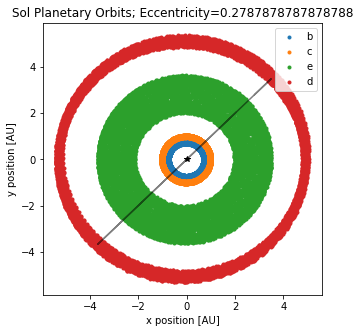

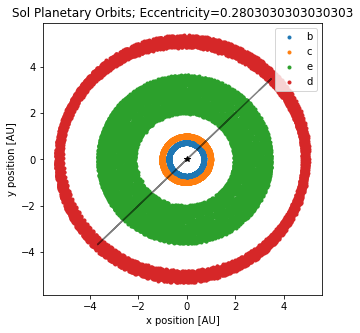

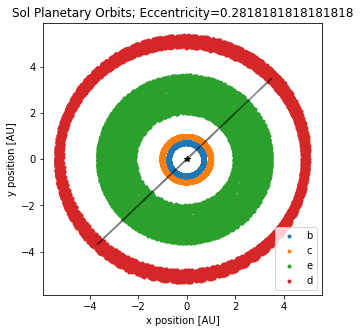

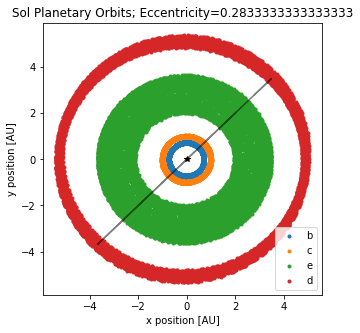

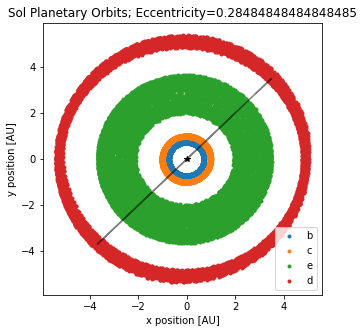

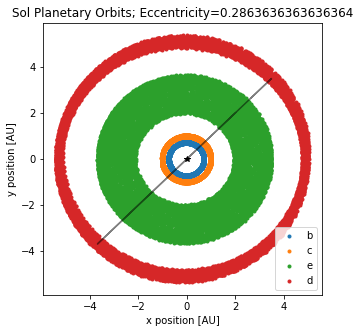

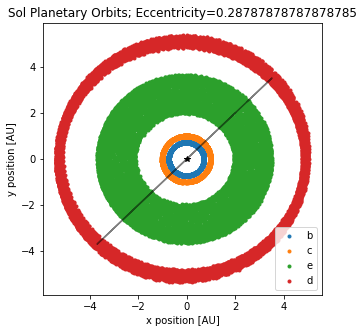

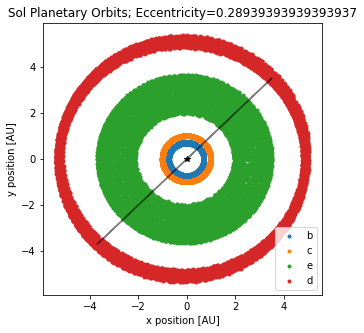

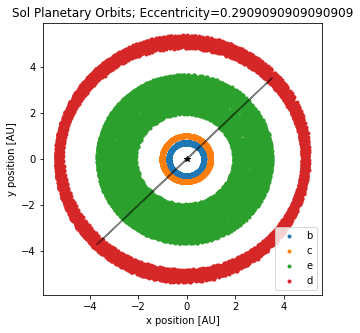

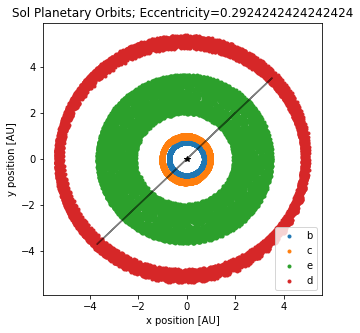

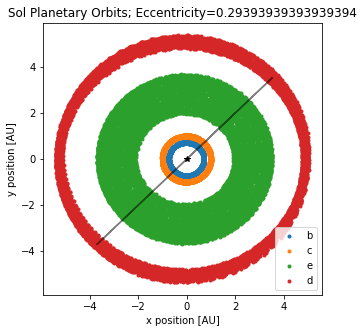

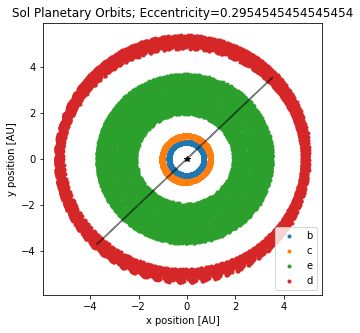

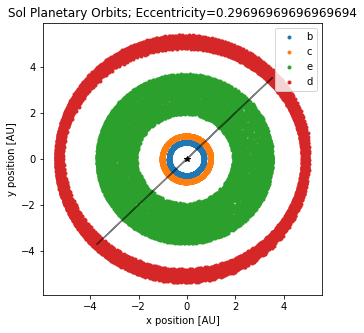

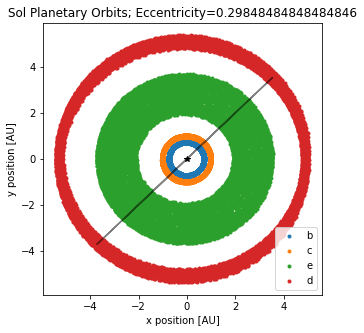

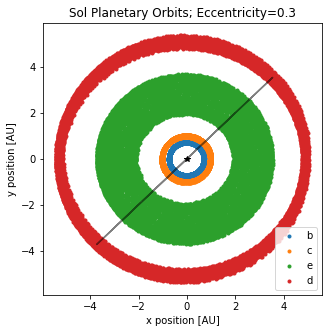

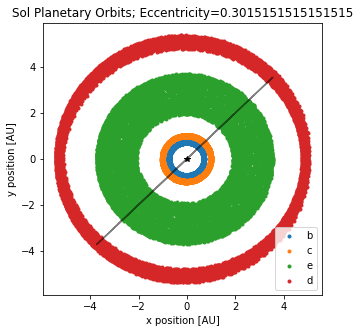

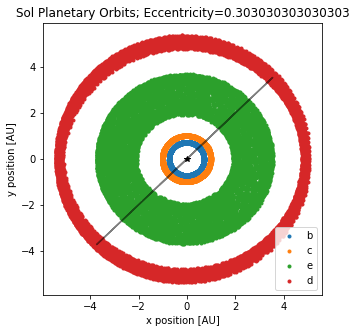

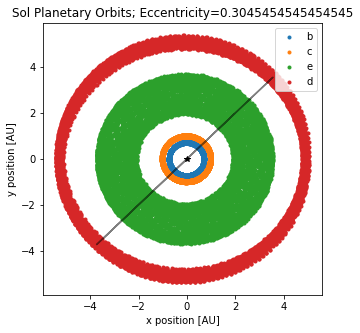

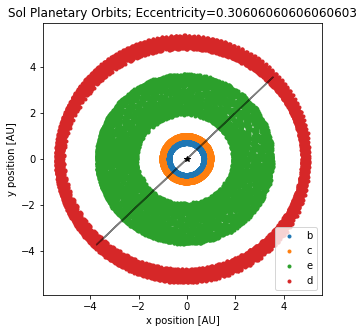

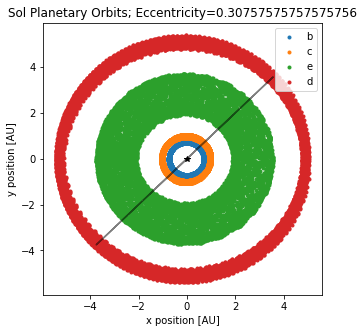

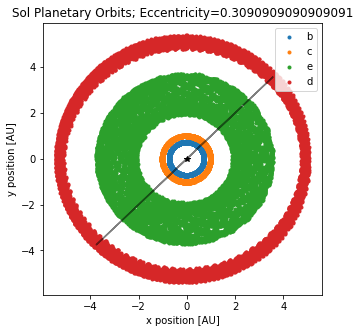

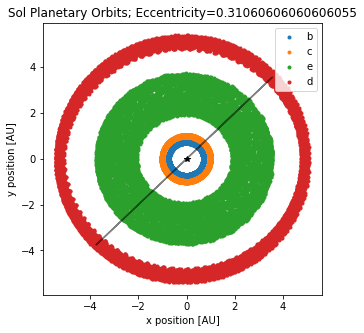

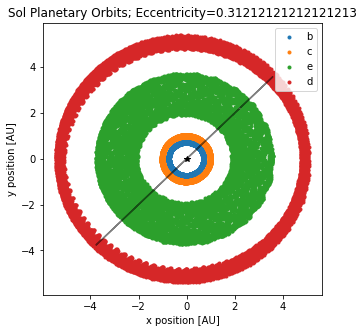

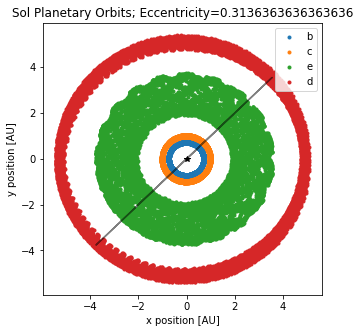

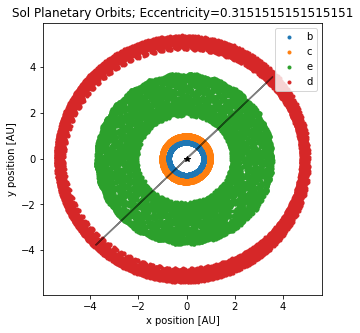

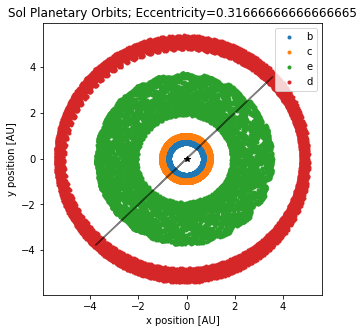

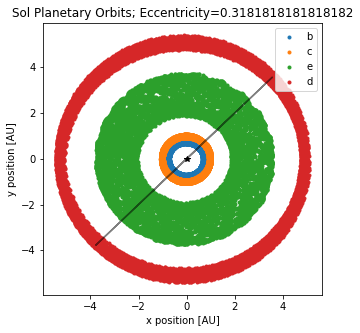

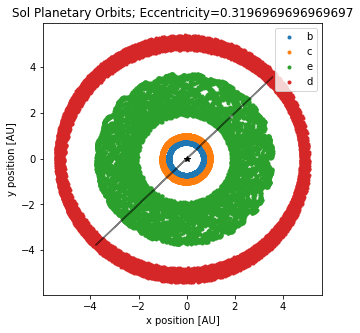

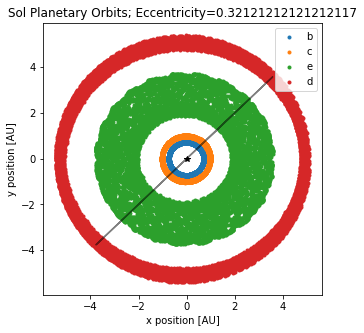

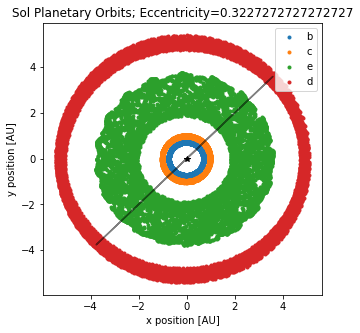

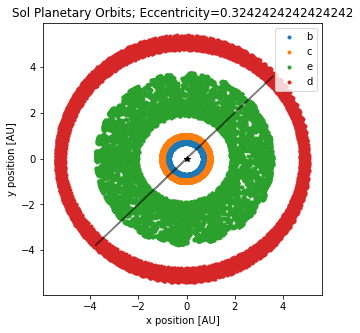

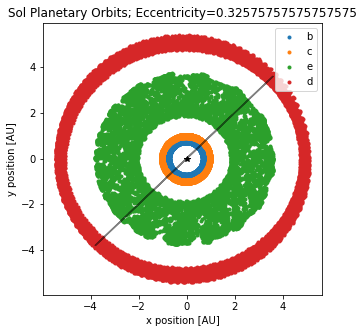

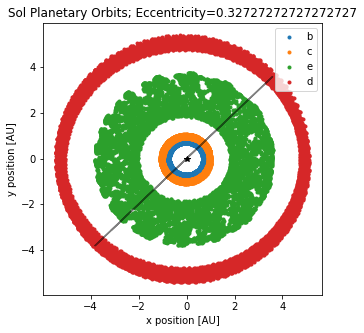

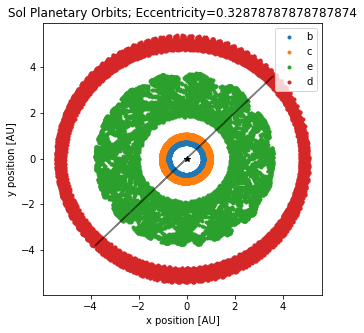

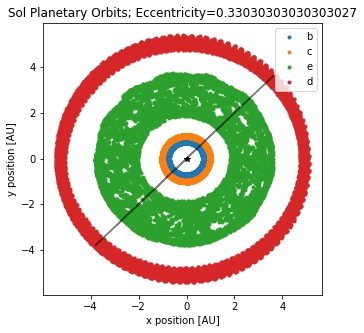

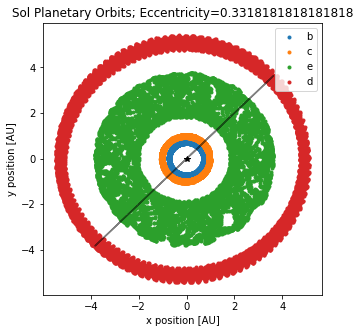

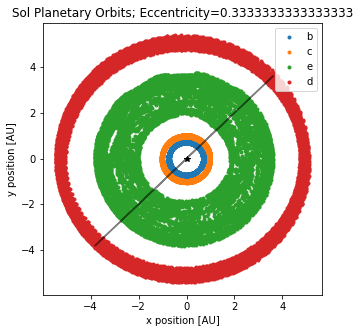

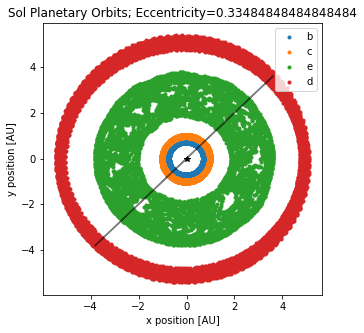

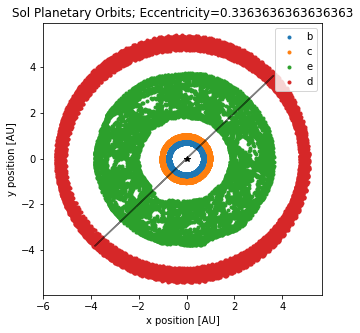

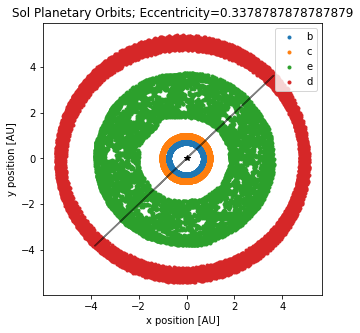

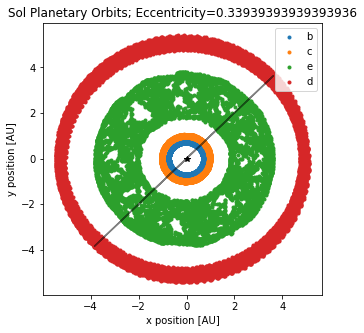

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


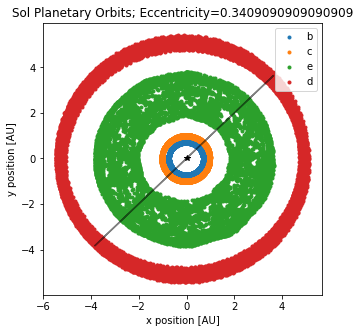

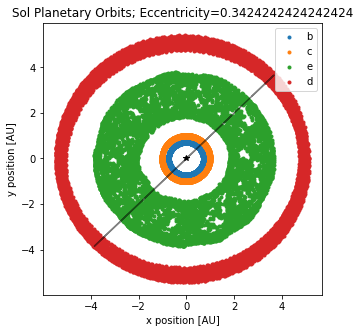

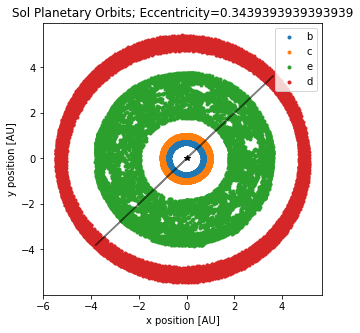

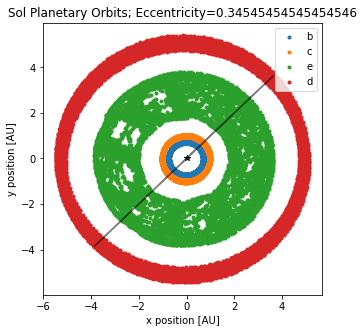

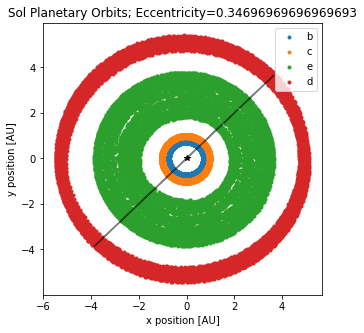

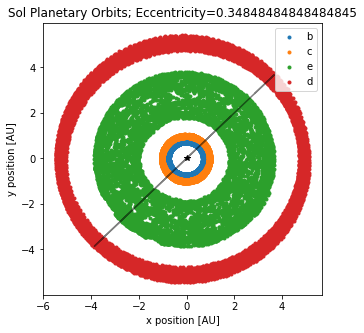

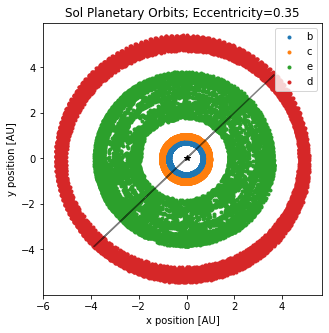

In [22]:
# for ecc in eccentricities:
#     RunSim_Find_eccInst(ecc)

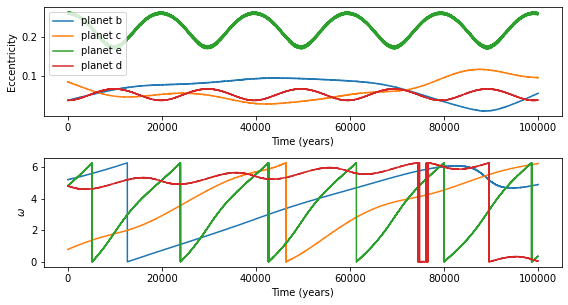

In [103]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(311)
plt.plot(times/365.25,ecc[0],label="planet b")
plt.plot(times/365.25,ecc[1],label="planet c")
plt.plot(times/365.25,ecc[2],label="planet e")
plt.plot(times/365.25,ecc[3],label="planet d")
ax1.set_xlabel("Time (years)")
ax1.set_ylabel("Eccentricity")
# ax1.set_xlim(0,10000)
plt.legend();
ax2 = plt.subplot(312,sharex=ax1)
# plt.plot(times/365.25,sma[0],label="planet b")
# plt.plot(times/365.25,sma[1],label="planet c")
# plt.plot(times/365.25,sma[2],label="planet e")
# plt.plot(times/365.25,sma[3],label="planet d")
# ax2.set_xlabel("Time (years)")
# ax3 = plt.subplot(313)
plt.plot(times/365.25,omega[0],label="planet b")
plt.plot(times/365.25,omega[1],label="planet c")
plt.plot(times/365.25,omega[2],label="planet e")
plt.plot(times/365.25,omega[3],label="planet d")
ax2.set_xlabel("Time (years)")
ax2.set_ylabel("$ω$")
fig.tight_layout()

Find $\phi_0$ , initial lunar phase wrt to Earth

In [110]:
# We can add objects by name, since REBOUND is linked to the HORIZONS database.
labels = ["Sun","Venus","Earth","Mars","Jupiter"]
sim = rebound.Simulation()
sim.units = ('AU', 'days', 'Msun')
sim.add(labels)
# os = sim.calculate_orbits()
nplanets=4
nyears= 100
sim.integrator = "whfast"
sim.dt = 0.5 * os[1].P  # 5% of inner planet's period
Nout = 10000            # number of points to display
tmax = nyears*365.25         # let the simulation run for given number of years
x = np.zeros((nplanets,Nout))
ecc = np.zeros((nplanets,Nout))
longitude = np.zeros((nplanets,Nout))
omega = np.zeros((nplanets,Nout))
sma=np.zeros((nplanets,Nout))

times = np.linspace(0.,tmax,Nout)
ps = sim.particles

for i,time in enumerate(times):
    sim.integrate(time)
    # note we use integrate() with the default exact_finish_time=1, which changes the timestep near 
    # the outputs to match the output times we want.  This is what we want for a Fourier spectrum, 
    # but technically breaks WHFast's symplectic nature.  Not a big deal here.
    os = sim.calculate_orbits()
    for j in range(nplanets):
        x[j][i] = ps[j+1].x 
        ecc[j][i] = os[j].e
        sma[j][i] = os[j].a
        longitude[j][i] = os[j].l
        omega[j][i] = os[j].omega
#         varpi[j][i] = os[j].Omega + os[j].omega

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Venus'... 
Found: Venus Barycenter (299) (chosen from query 'Venus')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Moon'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Moon')
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


### Finding TTVs with Rebound

In [72]:
N=20
transittimes = np.zeros(N)
p = sim.particles
i = 0
while i<N:
    y_old = p[1].y - p[0].y 
    t_old = sim.t
    sim.integrate(sim.t+0.5) # check for transits every 0.5 time units. Note that 0.5 is shorter than one orbit
    t_new = sim.t
    if y_old*(p[1].y-p[0].y)<0. and p[1].x-p[0].x>0.:   # sign changed (y_old*y<0), planet in front of star (x>0)
        while t_new-t_old>1e-7:   # bisect until prec of 1e-5 reached
            if y_old*(p[1].y-p[0].y)<0.:
                t_new = sim.t
            else:
                t_old = sim.t
            sim.integrate( (t_new+t_old)/2.)
        transittimes[i] = sim.t
        i += 1
        sim.integrate(sim.t+0.05)       # integrate 0.05 to be past the transit
        
A = np.vstack([np.ones(N), range(N)]).T
c, m = np.linalg.lstsq(A, transittimes, rcond=-1)[0] # remove linear trend

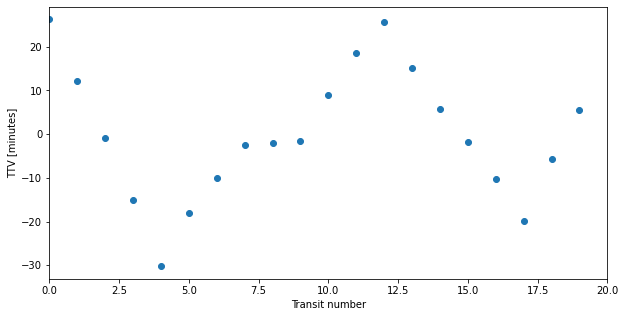

In [73]:
%matplotlib inline
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlim([0,N])
ax.set_xlabel("Transit number")
ax.set_ylabel("TTV [minutes]")
plt.scatter(range(N), (transittimes-m*np.array(range(N))-c)*(24.*365./2./np.pi));